In [18]:
source("/Users/wyx/Desktop/dissertation/wholecode.R")

## 1、Testing Single Parameter Beta Change

### 1）Age

In [7]:
# 数据生成偏移的data_shifted_age模块
generate_shifted_date_age_1 <- function(seed) {
  set.seed(seed)
  data <- generate_shifted_data_age(
    time_periods = 2,
    n = 9602,
    target_mortality_rate = 0.2,
    age_mean = 64.6,
    age_sd = 12.5,
    sex_prob = 0.309,
    cpd_prob = 0.107,
    pcs_prob = 0.282,
    cps_prob = 0.241, 
    beta_age_start = 0.0285181,
    beta_age_end = 0.0666354,
    beta_sex = 0.2196434,
    beta_cpd = 0.1886564,
    beta_pcs = 1.118599,
    beta_cps = 1.086517
  )
  return(data)
    
}

In [8]:
set.seed(123)
num_simulations <- 200

results_shifted_age_0.0666354 <- data.frame(
  auc = numeric(num_simulations),
  o_e = numeric(num_simulations),
  c_slope = numeric(num_simulations),
  brier_score = numeric(num_simulations)
)

for (i in 1:num_simulations) {
  set.seed(i)
  #生成数据集
  data_shifted_age_0.0666354 <- generate_shifted_date_age_1(i)
  
  # 训练模型
  model_shifted_age_0.0666354 <- train_model(data_shifted_age_0.0666354)
    
  # 计算性能指标
  metrics_shifted_age_0.0666354 <- calculate_performance_metrics(model_shifted_age_0.0666354)
  
  # 保存结果
  results_shifted_age_0.0666354[i, ] <- unlist(metrics_shifted_age_0.0666354)
}

# 计算中位数、25%和75%的性能指标
median_metrics_shifted_age_0.0666354 <- apply(results_shifted_age_0.0666354, 2, median)
quantile_25_metrics_shifted_age_0.0666354 <- apply(results_shifted_age_0.0666354, 2, quantile, probs = 0.25)
quantile_75_metrics_shifted_age_0.0666354 <- apply(results_shifted_age_0.0666354, 2, quantile, probs = 0.75)

# 将结果形成一个数据框
summary_metrics_shifted_age_0.0666354 <- data.frame(
  metric = names(median_metrics_shifted_age_0.0666354),
  median = median_metrics_shifted_age_0.0666354,
  quantile_25 = quantile_25_metrics_shifted_age_0.0666354,
  quantile_75 = quantile_75_metrics_shifted_age_0.0666354
)

# 打印最终结果
summary_metrics_shifted_age_0.0666354

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

,metric,median,quantile_25,quantile_75
,<chr>,<dbl>,<dbl>,<dbl>
auc,auc,0.7212374,0.7202485,0.7220553
o_e,o_e,0.9966522,0.9832342,1.0117633
c_slope,c_slope,0.9042082,0.8867129,0.9254505
brier_score,brier_score,0.1440122,0.1438731,0.1442462


In [9]:
data_age_shifted <- generate_shifted_date_age_1(12)
model_age_shifted <- train_model(data_age_shifted)
model_age_shifted
mean(data_age_shifted$age)
min(data_age_shifted$age)
max(data_age_shifted$age)
sd(data_age_shifted$age)

# 计算 sex 变量中每个取值的数量
sex_counts <- table(data_age_shifted$sex)
# 计算每个取值的比例
sex_proportions <- prop.table(sex_counts)
# 显示结果
sex_proportions

# 计算 cpd 变量中每个取值的数量
cpd_counts <- table(data_age_shifted$chronic_pulmonary_disease)
# 计算每个取值的比例
cpd_proportions <- prop.table(cpd_counts)
# 显示结果
cpd_proportions

# 计算 pcs 变量中每个取值的数量
pcs_counts <- table(data_age_shifted$previous_cardiac_surgery)
# 计算每个取值的比例
pcs_proportions <- prop.table(pcs_counts)
# 显示结果
pcs_proportions

# 计算 cpd 变量中每个取值的数量
cps_counts <- table(data_age_shifted$critical_preoperative_state)
# 计算每个取值的比例
cps_proportions <- prop.table(cps_counts)
# 显示结果
cps_proportions


# 计算 cpd 变量中每个取值的数量
mortality_counts <- table(data_age_shifted$mortality)
# 计算每个取值的比例
mortality_proportions <- prop.table(mortality_counts)
# 显示结果
mortality_proportions


Call:  glm(formula = mortality ~ age + sex + chronic_pulmonary_disease + 
    previous_cardiac_surgery + critical_preoperative_state, family = binomial, 
    data = data)

Coefficients:
                (Intercept)                          age  
                   -5.62986                      0.05038  
                        sex    chronic_pulmonary_disease  
                    0.15475                      0.10497  
   previous_cardiac_surgery  critical_preoperative_state  
                    1.17150                      1.18465  

Degrees of Freedom: 9601 Total (i.e. Null);  9596 Residual
Null Deviance:	    9751 
Residual Deviance: 8391 	AIC: 8403

[1] 66.50135

[1] 32.06684

[1] 95

[1] 13.07125


        0         1 
0.6915226 0.3084774 


        0         1 
0.8891898 0.1108102 


        0         1 
0.7196417 0.2803583 


        0         1 
0.7610914 0.2389086 


        0         1 
0.7946261 0.2053739 

In [10]:
# 假设你有一个函数 train_model 用于拟合模型，并返回模型对象
train_model <- function(data) {
  model <- glm(mortality ~ age + sex + chronic_pulmonary_disease + previous_cardiac_surgery + critical_preoperative_state, 
               data = data, family = binomial)
  return(model)
}

# 统计量列表
results <- data.frame()

for (seed in 1:200) {
  data_non_shifted <- generate_shifted_date_age_1(seed)
  
  # 计算统计量
  stats <- data.frame(
    mean_age = mean(data_non_shifted$age),
    min_age = min(data_non_shifted$age),
    max_age = max(data_non_shifted$age),
    sd_age = sd(data_non_shifted$age),
    sex_proportions_male = prop.table(table(data_non_shifted$sex))["0"],
    sex_proportions_female = prop.table(table(data_non_shifted$sex))["1"],
    cpd_proportions_0 = prop.table(table(data_non_shifted$chronic_pulmonary_disease))[1],
    cpd_proportions_1 = prop.table(table(data_non_shifted$chronic_pulmonary_disease))[2],
    pcs_proportions_0 = prop.table(table(data_non_shifted$previous_cardiac_surgery))[1],
    pcs_proportions_1 = prop.table(table(data_non_shifted$previous_cardiac_surgery))[2],
    cps_proportions_0 = prop.table(table(data_non_shifted$critical_preoperative_state))[1],
    cps_proportions_1 = prop.table(table(data_non_shifted$critical_preoperative_state))[2],
    mortality_proportions_0 = prop.table(table(data_non_shifted$mortality))[1],
    mortality_proportions_1 = prop.table(table(data_non_shifted$mortality))[2]
  )
  
  # 拟合模型并提取系数
  model <- train_model(data_non_shifted)
  coefs <- coef(model)
  
  # 将系数添加到统计量中
  stats <- cbind(stats, t(coefs[c("age", "sex", "chronic_pulmonary_disease", "previous_cardiac_surgery", "critical_preoperative_state")]))
  
  # 将每次循环的统计量结果合并到结果列表中
  results <- rbind(results, stats)
}

# 计算每个统计量的中位数
medians <- apply(results, 2, median)
print(medians)


                   mean_age                     min_age 
                66.49699648                 30.64920486 
                    max_age                      sd_age 
                95.00000000                 13.09269575 
       sex_proportions_male      sex_proportions_female 
                 0.69115809                  0.30884191 
          cpd_proportions_0           cpd_proportions_1 
                 0.89283483                  0.10716517 
          pcs_proportions_0           pcs_proportions_1 
                 0.71781920                  0.28218080 
          cps_proportions_0           cps_proportions_1 
                 0.75864403                  0.24135597 
    mortality_proportions_0     mortality_proportions_1 
                 0.79545928                  0.20454072 
                        age                         sex 
                 0.04664505                  0.21003269 
  chronic_pulmonary_disease    previous_cardiac_surgery 
                 0.17391029    

### 2）Chronic Pulmonary disease

In [12]:
# 数据生成偏移的data_shifted_cpd模块
generate_shifted_data_cpd_1 <- function(seed) {
  set.seed(seed)
  data <- generate_shifted_data_cpd(
    time_periods = 2,
    n = 9602,
    target_mortality_rate = 0.2,
    age_mean = 64.6,
    age_sd = 12.5,
    sex_prob = 0.309,
    cpd_prob = 0.107,
    pcs_prob = 0.282,
    cps_prob = 0.241, 
    beta_age= 0.0285181,
    beta_sex = 0.2196434,
    beta_cpd_start = 0.1886564,
    beta_cpd_end = 0.4931341,
    beta_pcs = 1.118599,
    beta_cps = 1.086517
  )
  return(data)
    
}

In [10]:
set.seed(123)
num_simulations <- 200
results_shifted_cpd_0.4931341 <- data.frame(auc = numeric(num_simulations), o_e = numeric(num_simulations), c_slope = numeric(num_simulations), brier_score = numeric(num_simulations))


for (i in 1:num_simulations) {
  set.seed(i)
  
  data_shifted_cpd_0.4931341 <- generate_shifted_data_cpd_1(i)
  # 训练模型
  model_shifted_cpd_0.4931341 <- train_model(data_shifted_cpd_0.4931341)
    
  # 计算性能指标
  metrics_shifted_cpd_0.4931341 <- calculate_performance_metrics(model_shifted_cpd_0.4931341)
  
  results_shifted_cpd_0.4931341[i, ] <- unlist(metrics_shifted_cpd_0.4931341)
}

# 计算中位数、25%和75%的性能指标
median_metrics_shifted_cpd_0.4931341 <- apply(results_shifted_cpd_0.4931341, 2, median)
quantile_25_metrics_shifted_cpd_0.4931341 <- apply(results_shifted_cpd_0.4931341, 2, quantile, probs = 0.25)
quantile_75_metrics_shifted_cpd_0.4931341 <- apply(results_shifted_cpd_0.4931341, 2, quantile, probs = 0.75)

# 将结果形成一个数据框
summary_metrics_shifted_cpd_0.4931341 <- data.frame(
  metric = names(median_metrics_shifted_cpd_0.4931341),
  median = median_metrics_shifted_cpd_0.4931341,
  quantile_25 = quantile_25_metrics_shifted_cpd_0.4931341,
  quantile_75 = quantile_75_metrics_shifted_cpd_0.4931341
)

# 打印最终结果
summary_metrics_shifted_cpd_0.4931341


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

,metric,median,quantile_25,quantile_75
,<chr>,<dbl>,<dbl>,<dbl>
auc,auc,0.7249185,0.7243515,0.7254054
o_e,o_e,0.9957816,0.9788171,1.0124569
c_slope,c_slope,1.0525433,1.0314466,1.0769947
brier_score,brier_score,0.1432773,0.1431763,0.1434101


In [15]:
data_cpd_shifted <- generate_shifted_data_cpd_1 (1)
model_cpd_shifted <- train_model(data_cpd_shifted)
model_cpd_shifted
mean(data_cpd_shifted$age)
min(data_cpd_shifted$age)
max(data_cpd_shifted$age)
sd(data_cpd_shifted$age)

# 计算 sex 变量中每个取值的数量
sex_counts <- table(data_cpd_shifted$sex)
# 计算每个取值的比例
sex_proportions <- prop.table(sex_counts)
# 显示结果
sex_proportions

# 计算 cpd 变量中每个取值的数量
cpd_counts <- table(data_cpd_shifted$chronic_pulmonary_disease)
# 计算每个取值的比例
cpd_proportions <- prop.table(cpd_counts)
# 显示结果
cpd_proportions

# 计算 pcs 变量中每个取值的数量
pcs_counts <- table(data_cpd_shifted$previous_cardiac_surgery)
# 计算每个取值的比例
pcs_proportions <- prop.table(pcs_counts)
# 显示结果
pcs_proportions

# 计算 cpd 变量中每个取值的数量
cps_counts <- table(data_cpd_shifted$critical_preoperative_state)
# 计算每个取值的比例
cps_proportions <- prop.table(cps_counts)
# 显示结果
cps_proportions


# 计算 cpd 变量中每个取值的数量
mortality_counts <- table(data_cpd_shifted$mortality)
# 计算每个取值的比例
mortality_proportions <- prop.table(mortality_counts)
# 显示结果
mortality_proportions


Call:  glm(formula = mortality ~ age + sex + chronic_pulmonary_disease + 
    previous_cardiac_surgery + critical_preoperative_state, family = binomial, 
    data = data)

Coefficients:
                (Intercept)                          age  
                   -4.01076                      0.02713  
                        sex    chronic_pulmonary_disease  
                    0.15626                      0.34496  
   previous_cardiac_surgery  critical_preoperative_state  
                    1.15148                      1.08809  

Degrees of Freedom: 9601 Total (i.e. Null);  9596 Residual
Null Deviance:	    9647 
Residual Deviance: 8696 	AIC: 8708

[1] 66.30688

[1] 30.22675

[1] 95

[1] 13.07283


        0         1 
0.6898563 0.3101437 


        0         1 
0.8933556 0.1066444 


        0         1 
0.7262029 0.2737971 


        0         1 
0.7604666 0.2395334 


        0         1 
0.7985836 0.2014164 

In [16]:
# 假设你有一个函数 train_model 用于拟合模型，并返回模型对象
train_model <- function(data) {
  model <- glm(mortality ~ age + sex + chronic_pulmonary_disease + previous_cardiac_surgery + critical_preoperative_state, 
               data = data, family = binomial)
  return(model)
}

# 统计量列表
results <- data.frame()

for (seed in 1:200) {
  data_non_shifted <- generate_shifted_data_cpd_1(seed)
  
  # 计算统计量
  stats <- data.frame(
    mean_age = mean(data_non_shifted$age),
    min_age = min(data_non_shifted$age),
    max_age = max(data_non_shifted$age),
    sd_age = sd(data_non_shifted$age),
    sex_proportions_male = prop.table(table(data_non_shifted$sex))["0"],
    sex_proportions_female = prop.table(table(data_non_shifted$sex))["1"],
    cpd_proportions_0 = prop.table(table(data_non_shifted$chronic_pulmonary_disease))[1],
    cpd_proportions_1 = prop.table(table(data_non_shifted$chronic_pulmonary_disease))[2],
    pcs_proportions_0 = prop.table(table(data_non_shifted$previous_cardiac_surgery))[1],
    pcs_proportions_1 = prop.table(table(data_non_shifted$previous_cardiac_surgery))[2],
    cps_proportions_0 = prop.table(table(data_non_shifted$critical_preoperative_state))[1],
    cps_proportions_1 = prop.table(table(data_non_shifted$critical_preoperative_state))[2],
    mortality_proportions_0 = prop.table(table(data_non_shifted$mortality))[1],
    mortality_proportions_1 = prop.table(table(data_non_shifted$mortality))[2]
  )
  
  # 拟合模型并提取系数
  model <- train_model(data_non_shifted)
  coefs <- coef(model)
  
  # 将系数添加到统计量中
  stats <- cbind(stats, t(coefs[c("age", "sex", "chronic_pulmonary_disease", "previous_cardiac_surgery", "critical_preoperative_state")]))
  
  # 将每次循环的统计量结果合并到结果列表中
  results <- rbind(results, stats)
}

# 计算每个统计量的中位数
medians <- apply(results, 2, median)
print(medians)


                   mean_age                     min_age 
                66.48121604                 30.96159476 
                    max_age                      sd_age 
                95.00000000                 13.09409850 
       sex_proportions_male      sex_proportions_female 
                 0.69063737                  0.30936263 
          cpd_proportions_0           cpd_proportions_1 
                 0.89293897                  0.10706103 
          pcs_proportions_0           pcs_proportions_1 
                 0.71781920                  0.28218080 
          cps_proportions_0           cps_proportions_1 
                 0.75952926                  0.24047074 
    mortality_proportions_0     mortality_proportions_1 
                 0.79566757                  0.20433243 
                        age                         sex 
                 0.02843333                  0.21620144 
  chronic_pulmonary_disease    previous_cardiac_surgery 
                 0.34646809    

### 3） Both

In [18]:
# 通用的数据生成模块
generate_shifted_data_both_1 <- function(seed) {
  set.seed(seed)
  data <- generate_shifted_data_both(
    time_periods = 2,
    n = 9602,
    target_mortality_rate = 0.2,
    age_mean = 64.6,
    age_sd = 12.5,
    sex_prob = 0.309,
    cpd_prob = 0.107,
    pcs_prob = 0.282,
    cps_prob = 0.241, 
    beta_age_start = 0.0285181,
    beta_age_end = 0.0666354,
    beta_cps = 1.086517,
    beta_sex = 0.2196434,
    beta_cpd_start = 0.1886564,
    beta_cpd_end = 0.4931341,
    beta_pcs = 1.118599
  )
  return(data)
}


In [19]:
results_shifted_both_1 <- data.frame()

# 运行实验
set.seed(123)

num_simulations <- 200

summary_results_shifted_both <- data.frame(auc = numeric(num_simulations), o_e = numeric(num_simulations), c_slope = numeric(num_simulations), brier_score = numeric(num_simulations))

for (i in 1:num_simulations) {
    set.seed(i)
    
    data_train <- generate_shifted_data_both_1(i)
    
    # 训练模型
    model <- train_model(data_train)
    
    # 计算性能指标
    metrics <- calculate_performance_metrics(model)
    
    summary_results_shifted_both[i, ] <- unlist(metrics)
}

# 计算中位数、25%和75%性能指标
median_metrics_shifted_both <- apply(summary_results_shifted_both, 2, median)
quantile_25_metrics_shifted_both <- apply(summary_results_shifted_both, 2, quantile, probs = 0.25)
quantile_75_metrics_shifted_both <- apply(summary_results_shifted_both, 2, quantile, probs = 0.75)

# 将实验名称、中位数、25%和75%结果添加到总的结果数据框
summary_metrics_shifted_both <- data.frame(
    auc = paste0(
        format(median_metrics_shifted_both['auc'], digits = 7, nsmall = 7), " (", 
        format(quantile_25_metrics_shifted_both['auc'], digits = 7, nsmall = 7), ", ", 
        format(quantile_75_metrics_shifted_both['auc'], digits = 7, nsmall = 7), ")"
    ),
    o_e = paste0(
        format(median_metrics_shifted_both['o_e'], digits = 7, nsmall = 7), " (", 
        format(quantile_25_metrics_shifted_both['o_e'], digits = 7, nsmall = 7), ", ", 
        format(quantile_75_metrics_shifted_both['o_e'], digits = 7, nsmall = 7), ")"
    ),
    c_slope = paste0(
        format(median_metrics_shifted_both['c_slope'], digits = 7, nsmall = 7), " (", 
        format(quantile_25_metrics_shifted_both['c_slope'], digits = 7, nsmall = 7), ", ", 
        format(quantile_75_metrics_shifted_both['c_slope'], digits = 7, nsmall = 7), ")"
    ),
    brier_score = paste0(
        format(median_metrics_shifted_both['brier_score'], digits = 7, nsmall = 7), " (", 
        format(quantile_25_metrics_shifted_both['brier_score'], digits = 7, nsmall = 7), ", ", 
        format(quantile_75_metrics_shifted_both['brier_score'], digits = 7, nsmall = 7), ")"
    )
)

results_shifted_both_1 <- rbind(results_shifted_both_1, summary_metrics_shifted_both)
results_shifted_both_1


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

auc,o_e,c_slope,brier_score
<chr>,<chr>,<chr>,<chr>
"0.7208534 (0.7199887, 0.7217732)","0.9998021 (0.9865051, 1.0155774)","0.9004348 (0.8820093, 0.9196104)","0.1441921 (0.1439694, 0.1443993)"


In [20]:
data_both_shifted <- generate_shifted_data_both_1 (1)
model_both_shifted <- train_model(data_both_shifted)
model_both_shifted
mean(data_both_shifted$age)
min(data_both_shifted$age)
max(data_both_shifted$age)
sd(data_both_shifted$age)

# 计算 sex 变量中每个取值的数量
sex_counts <- table(data_both_shifted$sex)
# 计算每个取值的比例
sex_proportions <- prop.table(sex_counts)
# 显示结果
sex_proportions

# 计算 cpd 变量中每个取值的数量
cpd_counts <- table(data_both_shifted$chronic_pulmonary_disease)
# 计算每个取值的比例
cpd_proportions <- prop.table(cpd_counts)
# 显示结果
cpd_proportions

# 计算 pcs 变量中每个取值的数量
pcs_counts <- table(data_both_shifted$previous_cardiac_surgery)
# 计算每个取值的比例
pcs_proportions <- prop.table(pcs_counts)
# 显示结果
pcs_proportions

# 计算 cpd 变量中每个取值的数量
cps_counts <- table(data_both_shifted$critical_preoperative_state)
# 计算每个取值的比例
cps_proportions <- prop.table(cps_counts)
# 显示结果
cps_proportions


# 计算 cpd 变量中每个取值的数量
mortality_counts <- table(data_both_shifted$mortality)
# 计算每个取值的比例
mortality_proportions <- prop.table(mortality_counts)
# 显示结果
mortality_proportions


Call:  glm(formula = mortality ~ age + sex + chronic_pulmonary_disease + 
    previous_cardiac_surgery + critical_preoperative_state, family = binomial, 
    data = data)

Coefficients:
                (Intercept)                          age  
                   -5.23167                      0.04402  
                        sex    chronic_pulmonary_disease  
                    0.19718                      0.34131  
   previous_cardiac_surgery  critical_preoperative_state  
                    1.11409                      1.09388  

Degrees of Freedom: 9601 Total (i.e. Null);  9596 Residual
Null Deviance:	    9516 
Residual Deviance: 8371 	AIC: 8383

[1] 66.45704

[1] 28.86687

[1] 95

[1] 13.03627


        0         1 
0.6919392 0.3080608 


        0         1 
0.8910644 0.1089356 


        0         1 
0.7213081 0.2786919 


        0         1 
0.7582795 0.2417205 


        0         1 
0.8034784 0.1965216 

In [22]:
# 假设你有一个函数 train_model 用于拟合模型，并返回模型对象
train_model <- function(data) {
  model <- glm(mortality ~ age + sex + chronic_pulmonary_disease + previous_cardiac_surgery + critical_preoperative_state, 
               data = data, family = binomial)
  return(model)
}

# 统计量列表
results <- data.frame()

for (seed in 1:200) {
  data_non_shifted <- generate_shifted_data_both_1(seed)
  
  # 计算统计量
  stats <- data.frame(
    mean_age = mean(data_non_shifted$age),
    min_age = min(data_non_shifted$age),
    max_age = max(data_non_shifted$age),
    sd_age = sd(data_non_shifted$age),
    sex_proportions_male = prop.table(table(data_non_shifted$sex))["0"],
    sex_proportions_female = prop.table(table(data_non_shifted$sex))["1"],
    cpd_proportions_0 = prop.table(table(data_non_shifted$chronic_pulmonary_disease))[1],
    cpd_proportions_1 = prop.table(table(data_non_shifted$chronic_pulmonary_disease))[2],
    pcs_proportions_0 = prop.table(table(data_non_shifted$previous_cardiac_surgery))[1],
    pcs_proportions_1 = prop.table(table(data_non_shifted$previous_cardiac_surgery))[2],
    cps_proportions_0 = prop.table(table(data_non_shifted$critical_preoperative_state))[1],
    cps_proportions_1 = prop.table(table(data_non_shifted$critical_preoperative_state))[2],
    mortality_proportions_0 = prop.table(table(data_non_shifted$mortality))[1],
    mortality_proportions_1 = prop.table(table(data_non_shifted$mortality))[2]
  )
  
  # 拟合模型并提取系数
  model <- train_model(data_non_shifted)
  coefs <- coef(model)
  
  # 将系数添加到统计量中
  stats <- cbind(stats, t(coefs[c("age", "sex", "chronic_pulmonary_disease", "previous_cardiac_surgery", "critical_preoperative_state")]))
  
  # 将每次循环的统计量结果合并到结果列表中
  results <- rbind(results, stats)
}

# 计算每个统计量的中位数
medians <- apply(results, 2, median)
print(medians)


                   mean_age                     min_age 
                66.49360324                 30.70634921 
                    max_age                      sd_age 
                95.00000000                 13.09825709 
       sex_proportions_male      sex_proportions_female 
                 0.69141845                  0.30858155 
          cpd_proportions_0           cpd_proportions_1 
                 0.89304312                  0.10695688 
          pcs_proportions_0           pcs_proportions_1 
                 0.71776713                  0.28223287 
          cps_proportions_0           cps_proportions_1 
                 0.75900854                  0.24099146 
    mortality_proportions_0     mortality_proportions_1 
                 0.79598000                  0.20402000 
                        age                         sex 
                 0.04621834                  0.21938505 
  chronic_pulmonary_disease    previous_cardiac_surgery 
                 0.33109618    

## 2、Testing Multiple Parameters Beta Change

## 1）Age

In [8]:
generate_shifted_data_age_2 <- function(seed, beta_age_start, beta_age_end) {
  set.seed(seed)
  data <- generate_shifted_data_age(
    time_periods = 2,
    n = 9602,
    target_mortality_rate = 0.2,
    age_mean = 64.6,
    age_sd = 12.5,
    sex_prob = 0.309,
    cpd_prob = 0.107,
    pcs_prob = 0.282,
    cps_prob = 0.241, 
    beta_age_start = beta_age_start,
    beta_age_end = beta_age_end,
    beta_sex = 0.2196434,
    beta_cpd = 0.1886564,
    beta_pcs = 1.118599,
    beta_cps = 1.086517
  )
  return(data)
}

In [9]:
experiments_age <- list(
  list(name = "age β:0.0285,0.0285", beta_age_start = 0.0285181, beta_age_end = 0.0285181),
  list(name = "age β:0.0285,0.0378", beta_age_start = 0.0285181, beta_age_end = 0.0378427),
  list(name = "age β:0.0285,0.0502", beta_age_start = 0.0285181, beta_age_end = 0.0502162),
  list(name = "age β:0.0285,0.0666", beta_age_start = 0.0285181, beta_age_end = 0.0666354),
  list(name = "age β:0.0285,0.0884", beta_age_start = 0.0285181, beta_age_end = 0.0884233),
  list(name = "age β:0.0285,0.1173", beta_age_start = 0.0285181, beta_age_end = 0.1173351),
  list(name = "age β:0.0285,0.1557", beta_age_start = 0.0285181, beta_age_end = 0.1557003),
  list(name = "age β:0.0285,0.2066", beta_age_start = 0.0285181, beta_age_end = 0.2066098),
  list(name = "age β:0.0285,0.2742", beta_age_start = 0.0285181, beta_age_end = 0.2741652),
  list(name = "age β:0.0285,0.3638", beta_age_start = 0.0285181, beta_age_end = 0.3638093)
)

In [10]:
experiments_age_2 <- list(
  list(name = "gradual_shifted_age_1", beta_age_start = 0.0285181, beta_age_end = 0.0285181),
  list(name = "gradual_shifted_age_2", beta_age_start = 0.0285181, beta_age_end = 0.0412239),
  list(name = "gradual_shifted_age_3", beta_age_start = 0.0285181, beta_age_end = 0.0539296),
  list(name = "gradual_shifted_age_4", beta_age_start = 0.0285181, beta_age_end = 0.0666354),
  list(name = "gradual_shifted_age_5", beta_age_start = 0.0285181, beta_age_end = 0.0793412),
  list(name = "gradual_shifted_age_6", beta_age_start = 0.0285181, beta_age_end = 0.0920469),
  list(name = "gradual_shifted_age_7", beta_age_start = 0.0285181, beta_age_end = 0.1047527),
  list(name = "gradual_shifted_age_8", beta_age_start = 0.0285181, beta_age_end = 0.1174585),
  list(name = "gradual_shifted_age_9", beta_age_start = 0.0285181, beta_age_end = 0.1301642),
  list(name = "gradual_shifted_age_10", beta_age_start = 0.0285181, beta_age_end = 0.14287)
)

In [11]:
results_shifted_age_2 <- data.frame()

# 运行实验
set.seed(123)
num_simulations <- 200

for (exp in experiments_age) {
  results <- data.frame(auc = numeric(num_simulations), o_e = numeric(num_simulations), c_slope = numeric(num_simulations), brier_score = numeric(num_simulations))
  
  for (i in 1:num_simulations) {
    set.seed(i)
    
    # 重定向输出
    sink(tempfile())
      
    data_train <- generate_shifted_data_age_2(i, exp$beta_age_start, exp$beta_age_end)
    
    # 训练模型
    model <- train_model(data_train)
      
    # 计算性能指标
    metrics <- calculate_performance_metrics(model)
    
    results[i, ] <- unlist(metrics)
    
    sink()  # 结束输出重定向
  }
  
  # 计算中位数、25%和75%的性能指标
  median_metrics_shifted_age_2 <- apply(results, 2, median)
  quantile_25_metrics_shifted_age_2 <- apply(results, 2, quantile, probs = 0.25)
  quantile_75_metrics_shifted_age_2 <- apply(results, 2, quantile, probs = 0.75)
  

  # 将实验名称和结果添加到总的结果数据框
  metrics_summary <- data.frame(
    experiment = exp$name,
    auc_median = median_metrics_shifted_age_2['auc'],
    auc_25 = quantile_25_metrics_shifted_age_2['auc'],
    auc_75 = quantile_75_metrics_shifted_age_2['auc'],
    o_e_median = median_metrics_shifted_age_2['o_e'],
    o_e_25 = quantile_25_metrics_shifted_age_2['o_e'],
    o_e_75 = quantile_75_metrics_shifted_age_2['o_e'],
    c_slope_median = median_metrics_shifted_age_2['c_slope'],
    c_slope_25 = quantile_25_metrics_shifted_age_2['c_slope'],
    c_slope_75 = quantile_75_metrics_shifted_age_2['c_slope'],
    brier_score_median = median_metrics_shifted_age_2['brier_score'],
    brier_score_25 = quantile_25_metrics_shifted_age_2['brier_score'],
    brier_score_75 = quantile_75_metrics_shifted_age_2['brier_score']
  )
  
  results_shifted_age_2 <- rbind(results_shifted_age_2, metrics_summary)
}

# 打印最终结果
results_shifted_age_2


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

,experiment,auc_median,auc_25,auc_75,o_e_median,o_e_25,o_e_75,c_slope_median,c_slope_25,c_slope_75,brier_score_median,brier_score_25,brier_score_75
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
auc,"age β:0.0285,0.0285",0.7255060,0.7251684,0.7258128,0.9966657,0.9828352,1.014548,1.0604768,1.0424979,1.0886021,0.1431278,0.1430508,0.1432152
auc1,"age β:0.0285,0.0378",0.7254094,0.7250981,0.7258013,1.0005370,0.9851791,1.013746,1.0305673,1.0093992,1.0523341,0.1430812,0.1430131,0.1431580
auc2,"age β:0.0285,0.0502",0.7242951,0.7236075,0.7247847,0.9989214,0.9838869,1.015625,0.9759101,0.9591624,0.9986619,0.1433274,0.1432239,0.1434521
auc3,"age β:0.0285,0.0666",0.7212374,0.7202485,0.7220553,0.9966522,0.9832342,1.011763,0.9042082,0.8867129,0.9254505,0.1440122,0.1438731,0.1442462
auc4,"age β:0.0285,0.0884",0.7163496,0.7150366,0.7173824,0.9997604,0.9848837,1.012607,0.8151371,0.7972148,0.8307731,0.1454893,0.1451630,0.1457427
auc5,"age β:0.0285,0.1173",0.7086567,0.7071619,0.7098257,1.0026369,0.9863404,1.016381,0.7198749,0.7047233,0.7374205,0.1477235,0.1474144,0.1482080
auc6,"age β:0.0285,0.1557",0.6997314,0.6980246,0.7012468,0.9982868,0.9853958,1.012741,0.6288467,0.6152554,0.6444042,0.1510094,0.1504193,0.1514163
auc7,"age β:0.0285,0.2066",0.6913131,0.6894535,0.6932145,0.9968979,0.9829753,1.010393,0.5580967,0.5473376,0.5702199,0.1542728,0.1537027,0.1549255
auc8,"age β:0.0285,0.2742",0.6843714,0.6824960,0.6864394,0.9945798,0.9816559,1.009266,0.5101358,0.5000341,0.5226351,0.1572585,0.1564400,0.1578345


Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0285' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0285' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0378' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0378' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0502' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0502' in 'mbcsToSbcs': dot su

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0884' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0884' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.1173' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.1173' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.1557' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.1557' in 'mbcsToSbcs': dot su

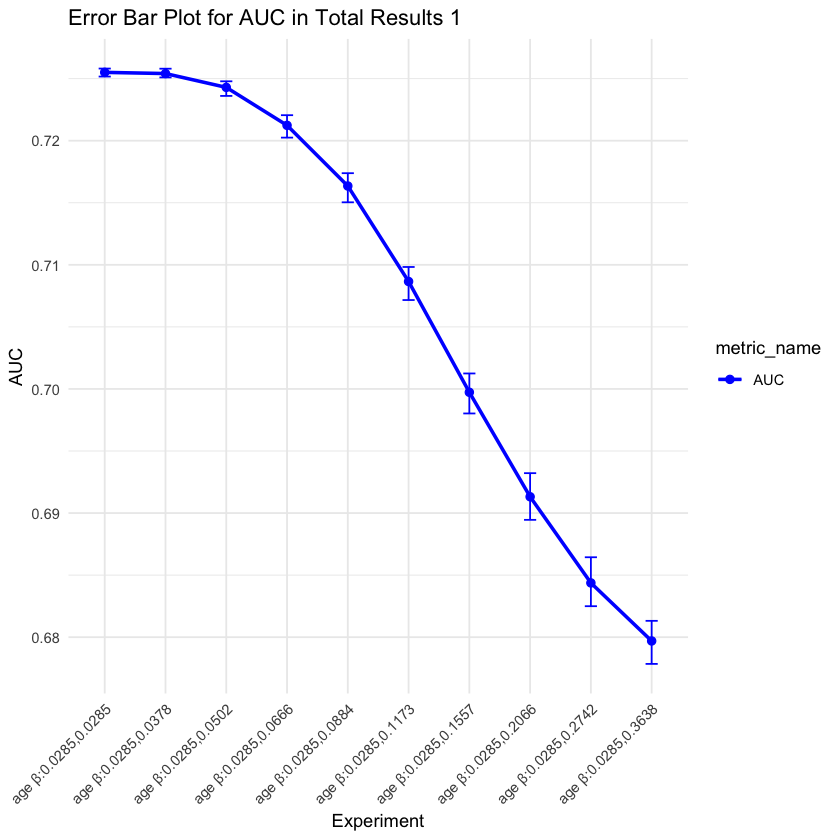

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0285' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0285' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0378' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0378' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0502' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0502' in 'mbcsToSbcs': dot su

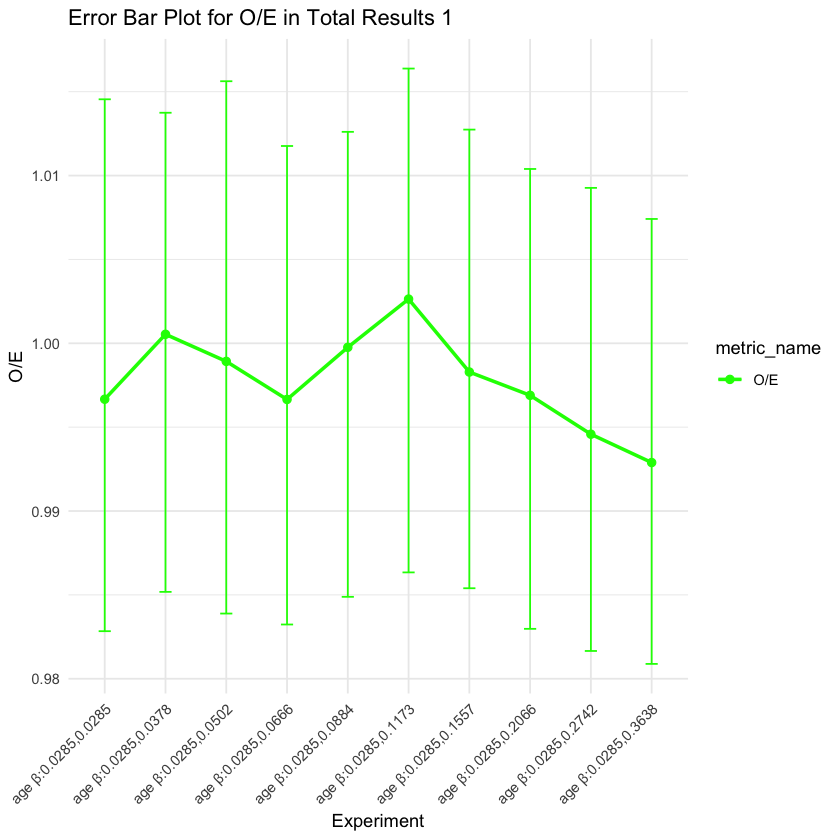

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0285' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0285' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0378' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0378' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0502' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0502' in 'mbcsToSbcs': dot su

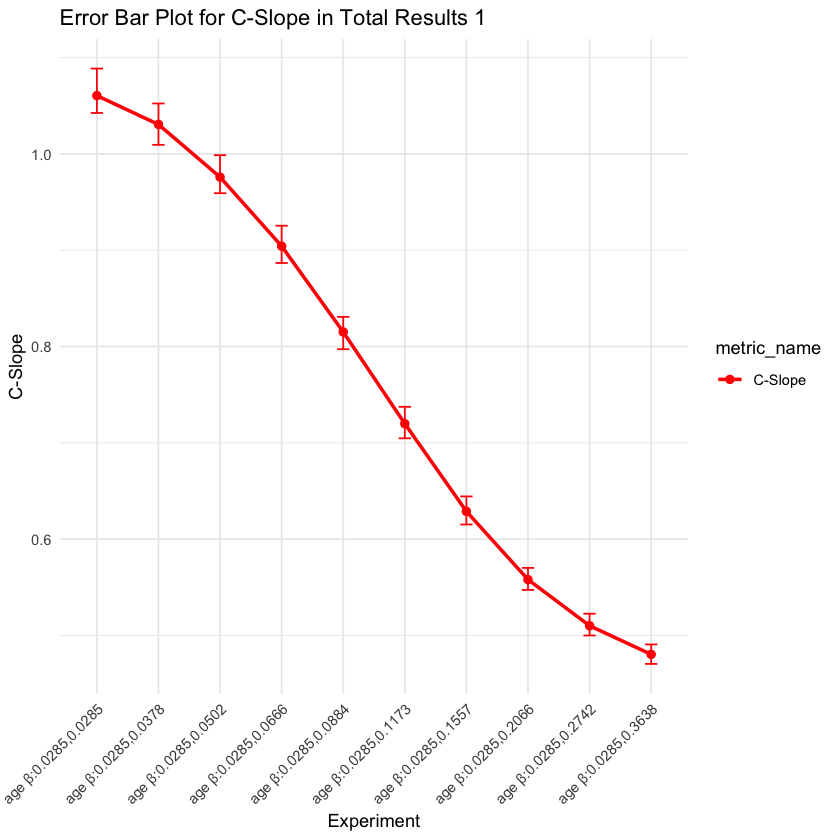

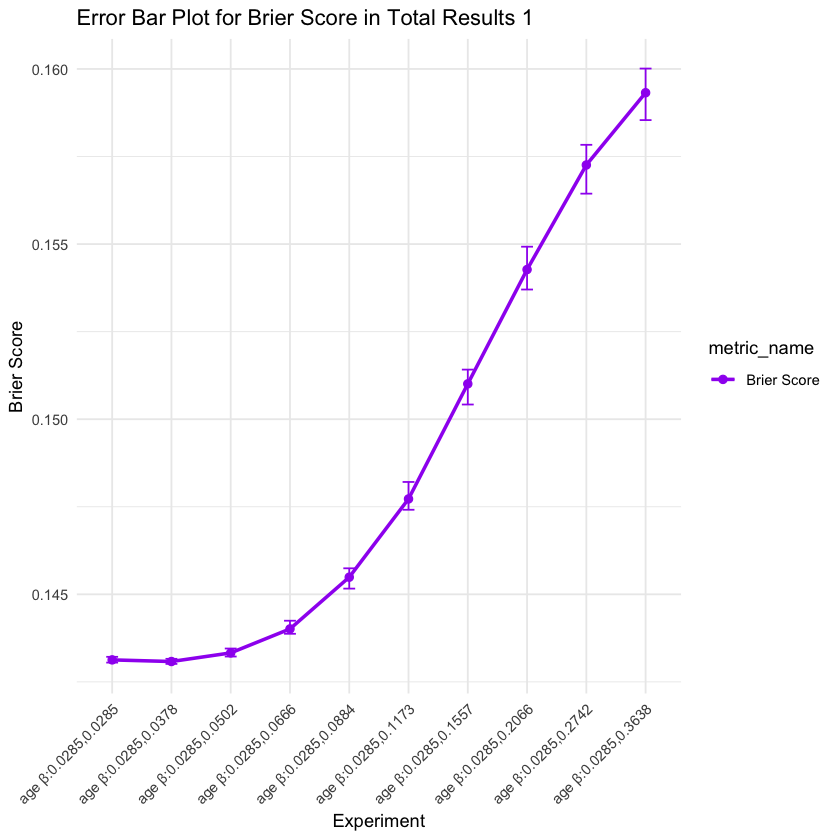

In [19]:
create_error_bar_plots(results_shifted_age_2, "Total Results 1")

### 2）Chronic Pulmonary disease

In [13]:
# 数据生成偏移的data_gradual_shifted_age模块
generate_shifted_data_cpd_2 <- function(seed, beta_cpd_start, beta_cpd_end) {
  set.seed(seed)
  data <- generate_shifted_data_cpd(
    time_periods = 2,
    n = 9602,
    target_mortality_rate = 0.2,
    age_mean = 64.6,
    age_sd = 12.5,
    sex_prob = 0.309,
    cpd_prob = 0.107,
    pcs_prob = 0.282,
    cps_prob = 0.241, 
    beta_age= 0.0285181,
    beta_sex = 0.2196434,
    beta_cpd_start = beta_cpd_start,
    beta_cpd_end = beta_cpd_end,
    beta_pcs = 1.118599,
    beta_cps = 1.086517
  )
  return(data)
    
}

In [14]:
experiments_cpd <- list(
  list(name = "cpd β: 0.1887,0.1887", beta_cpd_start = 0.1886564, beta_cpd_end = 0.1886564),
  list(name = "cpd β: 0.1887,0.2599", beta_cpd_start = 0.1886564, beta_cpd_end = 0.2598779),
  list(name = "cpd β: 0.1887,0.3580", beta_cpd_start = 0.1886564, beta_cpd_end = 0.357987),
  list(name = "cpd β: 0.1887,0.4931", beta_cpd_start = 0.1886564, beta_cpd_end = 0.4931341),
  list(name = "cpd β: 0.1887,0.6793", beta_cpd_start = 0.1886564, beta_cpd_end = 0.679302),
  list(name = "cpd β: 0.1887,0.9358", beta_cpd_start = 0.1886564, beta_cpd_end = 0.9357519),
  list(name = "cpd β: 0.1887,1.2890", beta_cpd_start = 0.1886564, beta_cpd_end = 1.2890166),
  list(name = "cpd β: 0.1887,1.7756", beta_cpd_start = 0.1886564, beta_cpd_end = 1.7756459),
  list(name = "cpd β: 0.1887,2.4460", beta_cpd_start = 0.1886564, beta_cpd_end = 2.4459872),
  list(name = "cpd β: 0.1887,3.3694", beta_cpd_start = 0.1886564, beta_cpd_end = 3.369395)
)

In [15]:
experiments_cpd_2 <- list(
  list(name = "gradual_shifted_cpd_1", beta_cpd_start = 0.1886564, beta_cpd_end = 0.1886564),
  list(name = "gradual_shifted_cpd_2", beta_cpd_start = 0.1886564, beta_cpd_end = 0.290149),
  list(name = "gradual_shifted_cpd_3", beta_cpd_start = 0.1886564, beta_cpd_end = 0.3916415),
  list(name = "gradual_shifted_cpd_4", beta_cpd_start = 0.1886564, beta_cpd_end = 0.4931341),
  list(name = "gradual_shifted_cpd_5", beta_cpd_start = 0.1886564, beta_cpd_end = 0.5946267),
  list(name = "gradual_shifted_cpd_6", beta_cpd_start = 0.1886564, beta_cpd_end = 0.6961192),
  list(name = "gradual_shifted_cpd_7", beta_cpd_start = 0.1886564, beta_cpd_end = 0.7976118),
  list(name = "gradual_shifted_cpd_8", beta_cpd_start = 0.1886564, beta_cpd_end = 0.8991044),
  list(name = "gradual_shifted_cpd_9", beta_cpd_start = 0.1886564, beta_cpd_end = 1.0005969),
  list(name = "gradual_shifted_cpd_10", beta_cpd_start = 0.1886564, beta_cpd_end = 1.1020895)
)

In [16]:
results_shifted_cpd_2 <- data.frame()

# 运行实验
set.seed(123)
num_simulations <- 200

for (exp in experiments_cpd) { # Ensure you have a list of experiments for cpd similar to experiments_age
  results <- data.frame(auc = numeric(num_simulations), o_e = numeric(num_simulations), c_slope = numeric(num_simulations), brier_score = numeric(num_simulations))
  
  for (i in 1:num_simulations) {
    set.seed(i)
    
    
    # Assuming `generate_shifted_data_cpd_0.4931341` is similar to `generate_shifted_data_age_2` in its function signature
    data_train <- generate_shifted_data_cpd_2(i, exp$beta_cpd_start, exp$beta_cpd_end)
    
    # 训练模型
    model <- train_model(data_train)
    
    # 计算性能指标
    metrics <- calculate_performance_metrics(model)
    
    results[i, ] <- unlist(metrics)
    
  }
  
  # 计算中位数、25%和75%的性能指标
  median_metrics_shifted_cpd_2 <- apply(results, 2, median)
  quantile_25_metrics_shifted_cpd_2 <- apply(results, 2, quantile, probs = 0.25)
  quantile_75_metrics_shifted_cpd_2 <- apply(results, 2, quantile, probs = 0.75)
  
  # 将实验名称和结果添加到总的结果数据框
  metrics_summary_2 <- data.frame(
    experiment = exp$name,
    auc_median = median_metrics_shifted_cpd_2['auc'],
    auc_25 = quantile_25_metrics_shifted_cpd_2['auc'],
    auc_75 = quantile_75_metrics_shifted_cpd_2['auc'],
    o_e_median = median_metrics_shifted_cpd_2['o_e'],
    o_e_25 = quantile_25_metrics_shifted_cpd_2['o_e'],
    o_e_75 = quantile_75_metrics_shifted_cpd_2['o_e'],
    c_slope_median = median_metrics_shifted_cpd_2['c_slope'],
    c_slope_25 = quantile_25_metrics_shifted_cpd_2['c_slope'],
    c_slope_75 = quantile_75_metrics_shifted_cpd_2['c_slope'],
    brier_score_median = median_metrics_shifted_cpd_2['brier_score'],
    brier_score_25 = quantile_25_metrics_shifted_cpd_2['brier_score'],
    brier_score_75 = quantile_75_metrics_shifted_cpd_2['brier_score']
  )
  
  results_shifted_cpd_2 <- rbind(results_shifted_cpd_2, metrics_summary_2)
}

# 打印最终结果
results_shifted_cpd_2


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

,experiment,auc_median,auc_25,auc_75,o_e_median,o_e_25,o_e_75,c_slope_median,c_slope_25,c_slope_75,brier_score_median,brier_score_25,brier_score_75
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
auc,"cpd β: 0.1887,0.1887",0.7255060,0.7251684,0.7258128,0.9966657,0.9828352,1.014548,1.0604768,1.0424979,1.0886021,0.1431278,0.1430508,0.1432152
auc1,"cpd β: 0.1887,0.2599",0.7254847,0.7251127,0.7258132,1.0001522,0.9812548,1.015173,1.0557876,1.0382685,1.0849033,0.1431430,0.1430651,0.1432445
auc2,"cpd β: 0.1887,0.3580",0.7253523,0.7248536,0.7256592,0.9988987,0.9800049,1.014307,1.0579664,1.0382363,1.0809872,0.1431926,0.1431019,0.1432873
auc3,"cpd β: 0.1887,0.4931",0.7249185,0.7243515,0.7254054,0.9957816,0.9788171,1.012457,1.0525433,1.0314466,1.0769947,0.1432773,0.1431763,0.1434101
auc4,"cpd β: 0.1887,0.6793",0.7242336,0.7234448,0.7248145,0.9973001,0.9794546,1.011785,1.0398140,1.0224756,1.0613847,0.1434579,0.1433323,0.1435999
auc5,"cpd β: 0.1887,0.9358",0.7225363,0.7217321,0.7234642,0.9998877,0.9835223,1.013224,1.0215662,0.9940619,1.0410917,0.1438126,0.1436317,0.1440287
auc6,"cpd β: 0.1887,1.2890",0.7195009,0.7186567,0.7204972,0.9980624,0.9846656,1.009784,0.9865199,0.9639662,1.0080450,0.1445475,0.1443422,0.1448064
auc7,"cpd β: 0.1887,1.7756",0.7148152,0.7135822,0.7159840,0.9961549,0.9824768,1.012934,0.9195879,0.9010082,0.9421864,0.1460190,0.1456728,0.1464435
auc8,"cpd β: 0.1887,2.4460",0.7078069,0.7065140,0.7092133,0.9910004,0.9788161,1.004715,0.8247616,0.8046426,0.8431435,0.1488896,0.1483417,0.1494561


Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.1887' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.1887' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.2599' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.2599' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.3580' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.3580' in 'mbcsToSbcs': 

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.6793' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.6793' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.9358' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.9358' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,1.2890' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,1.2890' in 'mbcsToSbcs': 

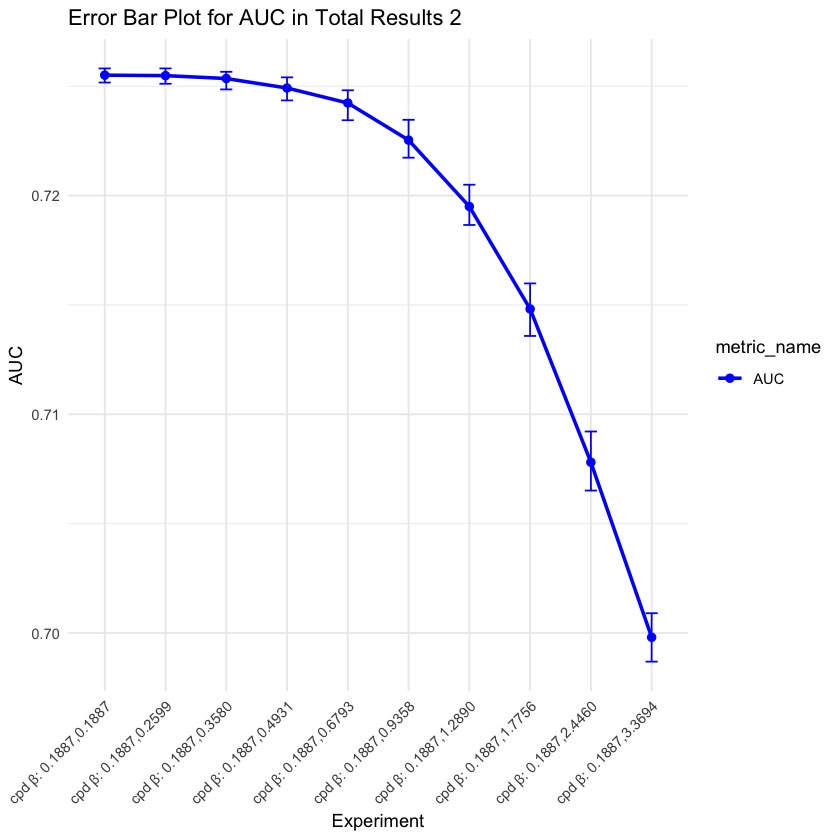

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.1887' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.1887' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.2599' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.2599' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.3580' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.3580' in 'mbcsToSbcs': 

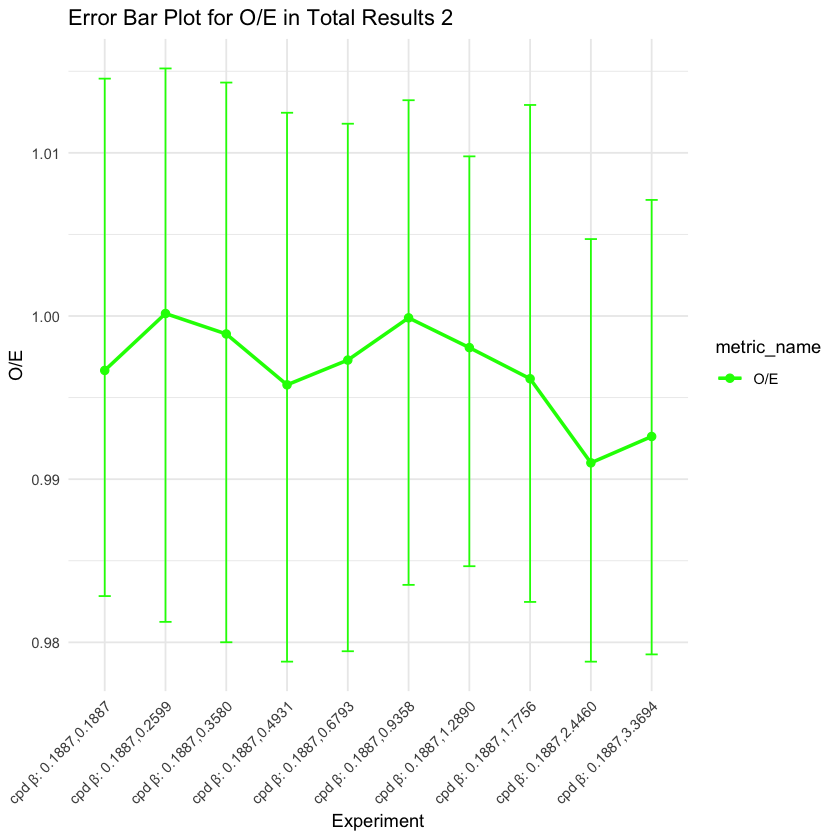

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.1887' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.1887' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.2599' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.2599' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.3580' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.3580' in 'mbcsToSbcs': 

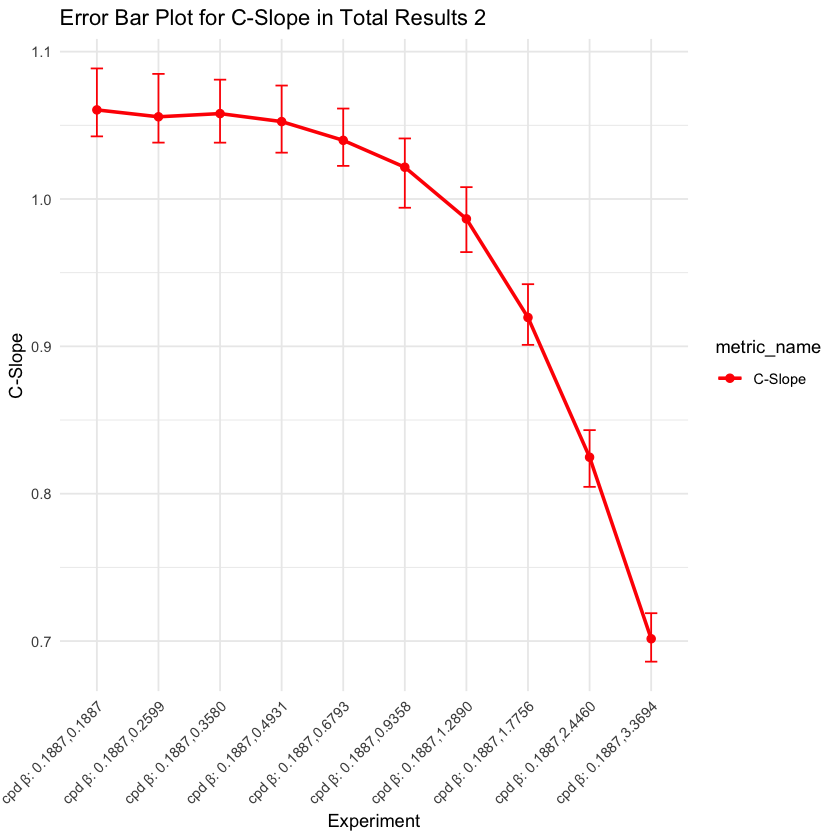

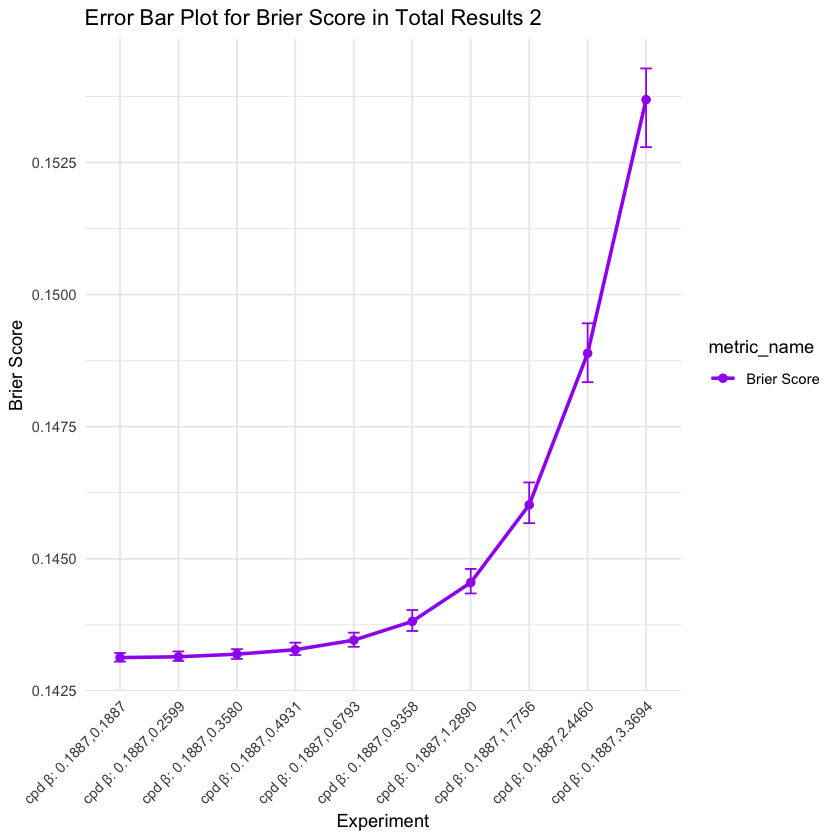

In [17]:
create_error_bar_plots(results_shifted_cpd_2, "Total Results 2")

### 3）Both

In [3]:
# 通用的数据生成模块
generate_shifted_data_both_2 <- function(seed, beta_age_start, beta_age_end, beta_cpd_start, beta_cpd_end) {
  set.seed(seed)
  data <- generate_shifted_data_both(
    time_periods = 2,
    n = 9602,
    target_mortality_rate = 0.2,
    age_mean = 64.6,
    age_sd = 12.5,
    sex_prob = 0.309,
    cpd_prob = 0.107,
    pcs_prob = 0.282,
    cps_prob = 0.241, 
    beta_age_start = beta_age_start,
    beta_age_end = beta_age_end,
    beta_cps = 1.086517,
    beta_sex = 0.2196434,
    beta_cpd_start = beta_cpd_start,
    beta_cpd_end = beta_cpd_end,
    beta_pcs = 1.118599
  )
  return(data)
}


In [4]:
experiments_both <- list(
  list(name = "age β:0.0285,0.0285; cpd β: 0.1887,0.1887", beta_age_start = 0.0285181, beta_age_end = 0.0285181, beta_cpd_start = 0.1886564, beta_cpd_end = 0.1886564),
  list(name = "age β:0.0285,0.0502; cpd β: 0.1887,0.2599", beta_age_start = 0.0285181, beta_age_end = 0.0378427, beta_cpd_start = 0.1886564, beta_cpd_end = 0.2598779),
  list(name = "age β:0.0285,0.0502; cpd β: 0.1887,0.3580", beta_age_start = 0.0285181, beta_age_end = 0.0502162, beta_cpd_start = 0.1886564, beta_cpd_end = 0.357987),
  list(name = "age β:0.0285,0.0666; cpd β: 0.1887,0.4931", beta_age_start = 0.0285181, beta_age_end = 0.0666354, beta_cpd_start = 0.1886564, beta_cpd_end = 0.4931341),
  list(name = "age β:0.0285,0.0884; cpd β: 0.1887,0.6793", beta_age_start = 0.0285181, beta_age_end = 0.0884233, beta_cpd_start = 0.1886564, beta_cpd_end = 0.679302),
  list(name = "age β:0.0285,0.1173; cpd β: 0.1887,0.9358", beta_age_start = 0.0285181, beta_age_end = 0.1173351, beta_cpd_start = 0.1886564, beta_cpd_end = 0.9357519),
  list(name = "age β:0.0285,0.1557; cpd β: 0.1887,1.2890", beta_age_start = 0.0285181, beta_age_end = 0.1557003, beta_cpd_start = 0.1886564, beta_cpd_end = 1.2890166),
  list(name = "age β:0.0285,0.2066; cpd β: 0.1887,1.7756", beta_age_start = 0.0285181, beta_age_end = 0.2066098, beta_cpd_start = 0.1886564, beta_cpd_end = 1.7756459),
  list(name = "age β:0.0285,0.2742; cpd β: 0.1887,2.4460", beta_age_start = 0.0285181, beta_age_end = 0.2741652, beta_cpd_start = 0.1886564, beta_cpd_end = 2.4459872),
  list(name = "age β:0.0285,0.3638; cpd β: 0.1887,3.3694", beta_age_start = 0.0285181, beta_age_end = 0.3638093, beta_cpd_start = 0.1886564, beta_cpd_end = 3.369395)
)


In [38]:
experiments_both_2 <- list(
  list(name = "1", beta_age_start = 0.0285181, beta_age_end = 0.0285181, beta_cpd_start = 0.1886564, beta_cpd_end = 0.1886564),
  list(name = "2", beta_age_start = 0.0285181, beta_age_end = 0.0378427, beta_cpd_start = 0.1886564, beta_cpd_end = 0.2598779),
  list(name = "3", beta_age_start = 0.0285181, beta_age_end = 0.0502162, beta_cpd_start = 0.1886564, beta_cpd_end = 0.357987),
  list(name = "4", beta_age_start = 0.0285181, beta_age_end = 0.0666354, beta_cpd_start = 0.1886564, beta_cpd_end = 0.4931341),
  list(name = "5", beta_age_start = 0.0285181, beta_age_end = 0.0884233, beta_cpd_start = 0.1886564, beta_cpd_end = 0.679302),
  list(name = "6", beta_age_start = 0.0285181, beta_age_end = 0.1173351, beta_cpd_start = 0.1886564, beta_cpd_end = 0.9357519),
  list(name = "7", beta_age_start = 0.0285181, beta_age_end = 0.1557003, beta_cpd_start = 0.1886564, beta_cpd_end = 1.2890166),
  list(name = "8", beta_age_start = 0.0285181, beta_age_end = 0.2066098, beta_cpd_start = 0.1886564, beta_cpd_end = 1.7756459),
  list(name = "9", beta_age_start = 0.0285181, beta_age_end = 0.2741652, beta_cpd_start = 0.1886564, beta_cpd_end = 2.4459872),
  list(name = "10", beta_age_start = 0.0285181, beta_age_end = 0.3638093, beta_cpd_start = 0.1886564, beta_cpd_end = 3.369395)
)


In [39]:
# 创建一个空的数据框来存储总结果
results_shifted_both_2 <- data.frame()

# 设置随机种子以确保结果的可重复性
set.seed(123)

# 定义模拟次数
num_simulations <- 200

# 运行实验
for (exp in experiments_both_2) { # 确保您有类似experiments_age的experiments_cpd列表
  # 创建一个数据框来存储单个实验的结果
  results <- data.frame(auc = numeric(num_simulations), o_e = numeric(num_simulations), c_slope = numeric(num_simulations), brier_score = numeric(num_simulations))
  
  for (i in 1:num_simulations) {
    set.seed(i)
    
    # 生成训练数据
    data_train <- generate_shifted_data_both_2(i, exp$beta_age_start, exp$beta_age_end, exp$beta_cpd_start, exp$beta_cpd_end)
    
    # 训练模型
    model <- train_model(data_train)
    
    # 计算性能指标
    metrics <- calculate_performance_metrics(model)
    
    # 将性能指标存储到数据框中
    results[i, ] <- unlist(metrics)
  }
  
  # 计算中位数、25%和75%的性能指标
  median_metrics_shifted_both_2 <- apply(results, 2, median)
  quantile_25_metrics_shifted_both_2 <- apply(results, 2, quantile, probs = 0.25)
  quantile_75_metrics_shifted_both_2 <- apply(results, 2, quantile, probs = 0.75)
  
  # 将实验名称和结果添加到总的结果数据框
  metrics_summary_3 <- data.frame(
    experiment = exp$name,
    auc_median = median_metrics_shifted_both_2['auc'],
    auc_25 = quantile_25_metrics_shifted_both_2['auc'],
    auc_75 = quantile_75_metrics_shifted_both_2['auc'],
    o_e_median = median_metrics_shifted_both_2['o_e'],
    o_e_25 = quantile_25_metrics_shifted_both_2['o_e'],
    o_e_75 = quantile_75_metrics_shifted_both_2['o_e'],
    c_slope_median = median_metrics_shifted_both_2['c_slope'],
    c_slope_25 = quantile_25_metrics_shifted_both_2['c_slope'],
    c_slope_75 = quantile_75_metrics_shifted_both_2['c_slope'],
    brier_score_median = median_metrics_shifted_both_2['brier_score'],
    brier_score_25 = quantile_25_metrics_shifted_both_2['brier_score'],
    brier_score_75 = quantile_75_metrics_shifted_both_2['brier_score']
  )
    
  
  results_shifted_both_2 <- rbind(results_shifted_both_2, metrics_summary_3)
}



Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

In [51]:
results_shifted_both_2

,experiment,auc_median,auc_25,auc_75,o_e_median,o_e_25,o_e_75,c_slope_median,c_slope_25,c_slope_75,brier_score_median,brier_score_25,brier_score_75
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
auc,"age:0.0285,0.0285; cpd: 0.1887,0.1887",0.7255060,0.7251684,0.7258128,0.9966657,0.9828352,1.014548,1.0604768,1.0424979,1.0886021,0.1431278,0.1430508,0.1432152
auc1,"age:0.0285,0.0502; cpd: 0.1887,0.2599",0.7254617,0.7250527,0.7257439,0.9969541,0.9803353,1.013120,1.0264668,1.0052422,1.0503239,0.1430996,0.1430413,0.1431858
auc2,"age:0.0285,0.0502; cpd: 0.1887,0.3580",0.7241394,0.7234855,0.7247120,0.9997710,0.9849490,1.015070,0.9743792,0.9520890,0.9966286,0.1433795,0.1432750,0.1435235
auc3,"age:0.0285,0.0666; cpd: 0.1887,0.4931",0.7208534,0.7199887,0.7217732,0.9998021,0.9865051,1.015577,0.9004348,0.8820093,0.9196104,0.1441921,0.1439694,0.1443993
auc4,"age:0.0285,0.0884; cpd: 0.1887,0.6793",0.7153144,0.7139896,0.7164667,0.9983300,0.9859331,1.012566,0.8089922,0.7895589,0.8254486,0.1458219,0.1454937,0.1460645
auc5,"age:0.0285,0.1173; cpd: 0.1887,0.9358",0.7078282,0.7061900,0.7089942,0.9938925,0.9836536,1.012209,0.7102322,0.6963590,0.7258713,0.1482399,0.1479134,0.1486683
auc6,"age:0.0285,0.1557; cpd: 0.1887,1.2890",0.6986092,0.6972056,0.7003364,0.9955029,0.9836274,1.008956,0.6216900,0.6074107,0.6342340,0.1515950,0.1510496,0.1521332
auc7,"age:0.0285,0.2066; cpd: 0.1887,1.7756",0.6906138,0.6891815,0.6925681,0.9967057,0.9828186,1.007459,0.5530453,0.5431824,0.5648277,0.1550054,0.1542739,0.1555315
auc8,"age:0.0285,0.2742; cpd: 0.1887,2.4460",0.6841308,0.6819212,0.6858790,0.9917293,0.9792192,1.005317,0.5049427,0.4944027,0.5169700,0.1580651,0.1571841,0.1586045


Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0285; cpd β: 0.1887,0.1887' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0285; cpd β: 0.1887,0.1887' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0285; cpd β: 0.1887,0.1887' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0285; cpd β: 0.1887,0.1887' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0502; cpd β: 0.1887,0.2599' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBound

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0285; cpd β: 0.1887,0.1887' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0502; cpd β: 0.1887,0.2599' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0502; cpd β: 0.1887,0.2599' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0502; cpd β: 0.1887,0.2599' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0502; cpd β: 0.1887,0.2599' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.C

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0502; cpd β: 0.1887,0.2599' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0502; cpd β: 0.1887,0.2599' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0502; cpd β: 0.1887,0.3580' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0502; cpd β: 0.1887,0.3580' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0502; cpd β: 0.1887,0.3580' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBound

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0502; cpd β: 0.1887,0.3580' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0502; cpd β: 0.1887,0.3580' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0502; cpd β: 0.1887,0.3580' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0666; cpd β: 0.1887,0.4931' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0666; cpd β: 0.1887,0.4931' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.C

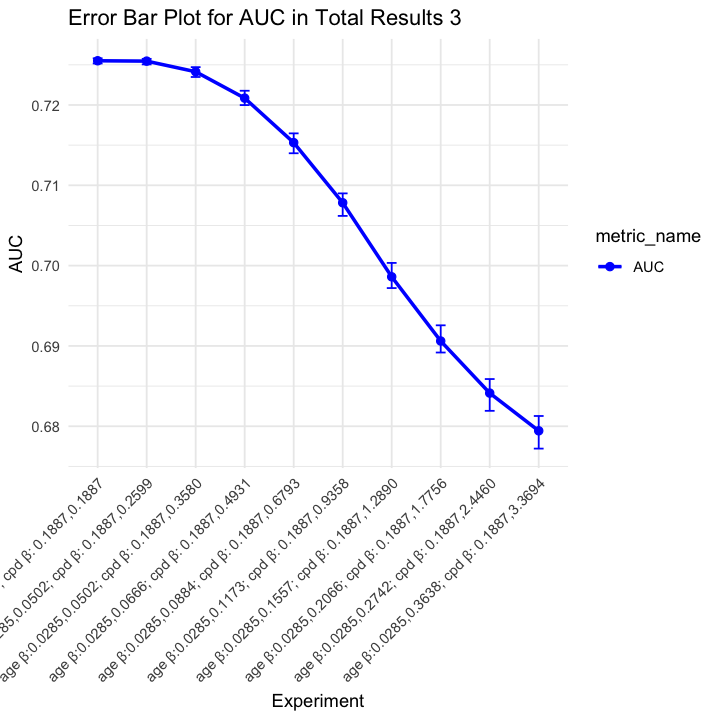

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0285; cpd β: 0.1887,0.1887' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0285; cpd β: 0.1887,0.1887' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0285; cpd β: 0.1887,0.1887' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0285; cpd β: 0.1887,0.1887' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0502; cpd β: 0.1887,0.2599' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBound

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0285; cpd β: 0.1887,0.1887' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0502; cpd β: 0.1887,0.2599' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0502; cpd β: 0.1887,0.2599' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0502; cpd β: 0.1887,0.2599' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0502; cpd β: 0.1887,0.2599' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.C

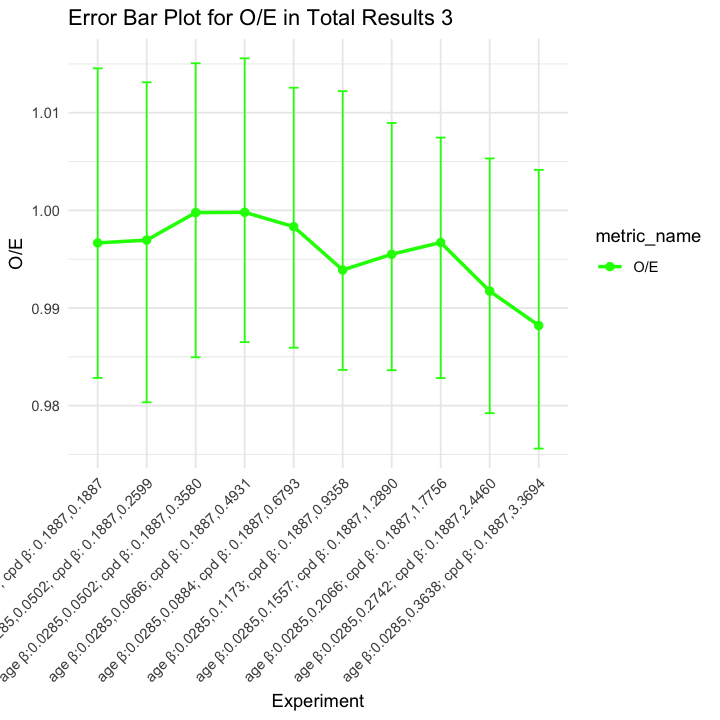

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0285; cpd β: 0.1887,0.1887' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0285; cpd β: 0.1887,0.1887' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0285; cpd β: 0.1887,0.1887' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0285; cpd β: 0.1887,0.1887' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0502; cpd β: 0.1887,0.2599' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBound

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0285; cpd β: 0.1887,0.1887' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0502; cpd β: 0.1887,0.2599' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0502; cpd β: 0.1887,0.2599' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0502; cpd β: 0.1887,0.2599' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0502; cpd β: 0.1887,0.2599' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.C

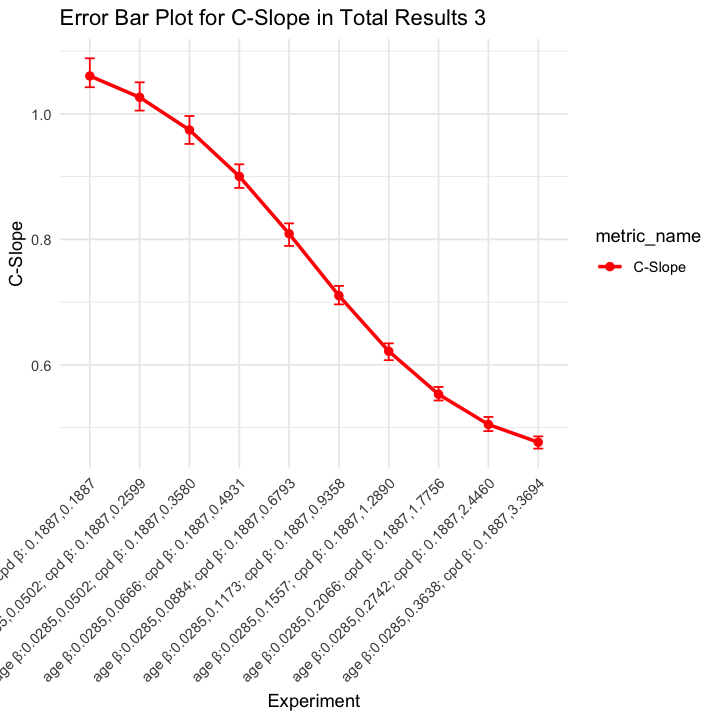

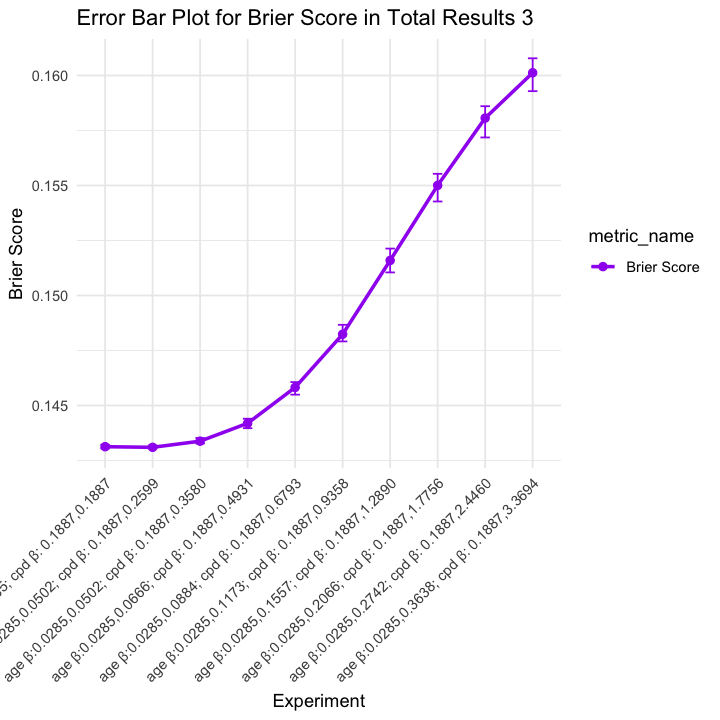

In [37]:
options(repr.plot.width = 6 , repr.plot.height = 6)
create_error_bar_plots(results_shifted_both_2, "Total Results 3")

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0285' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0285' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0378' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0378' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0502' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0502' in 'mbcsToSbcs': dot su

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.6793' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.6793' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.9358' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.9358' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,1.2890' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,1.2890' in 'mbcsToSbcs': 

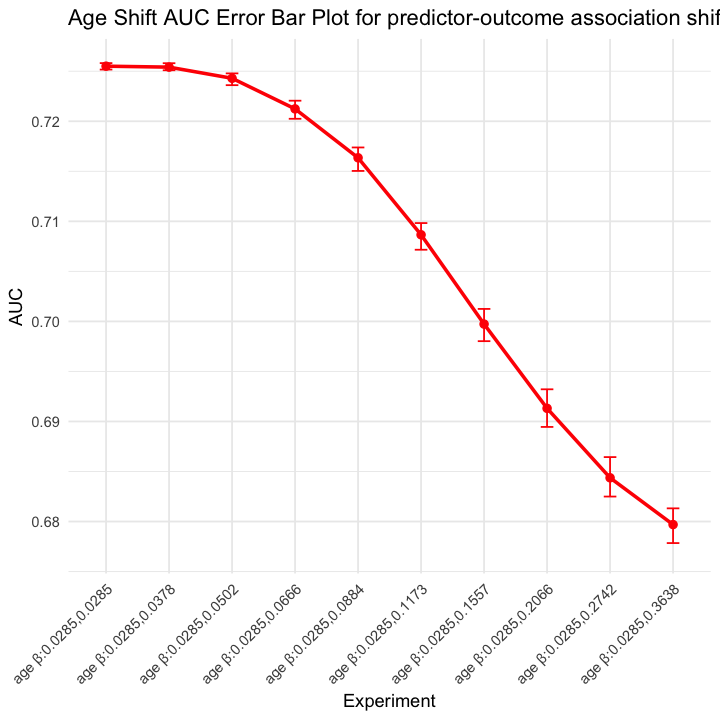

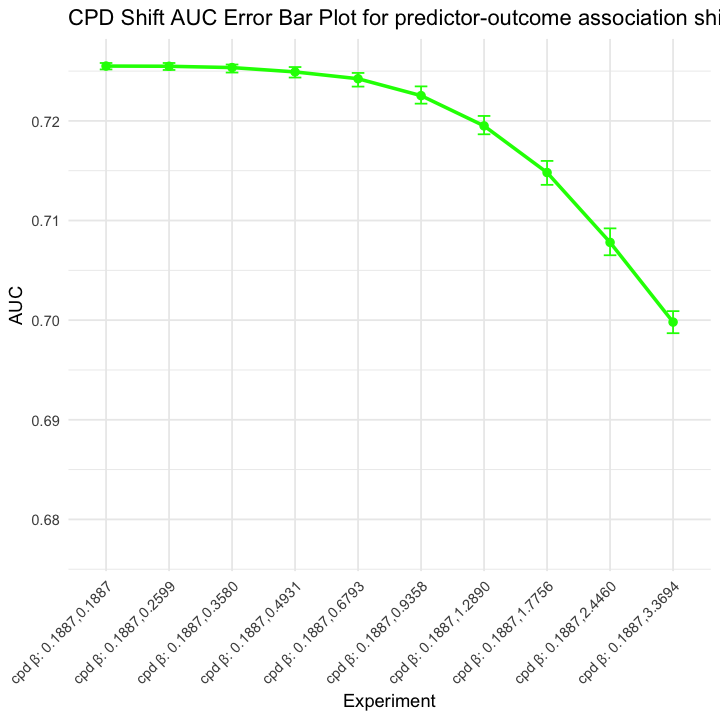

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0285' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0285' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0378' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0378' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0502' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0502' in 'mbcsToSbcs': dot su

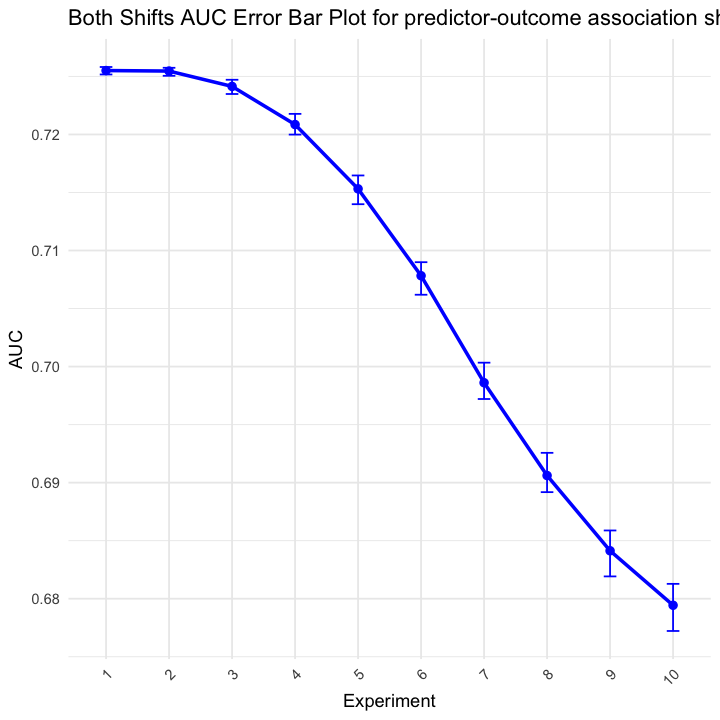

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.1887' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.1887' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.2599' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.2599' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.3580' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.3580' in 'mbcsToSbcs': 

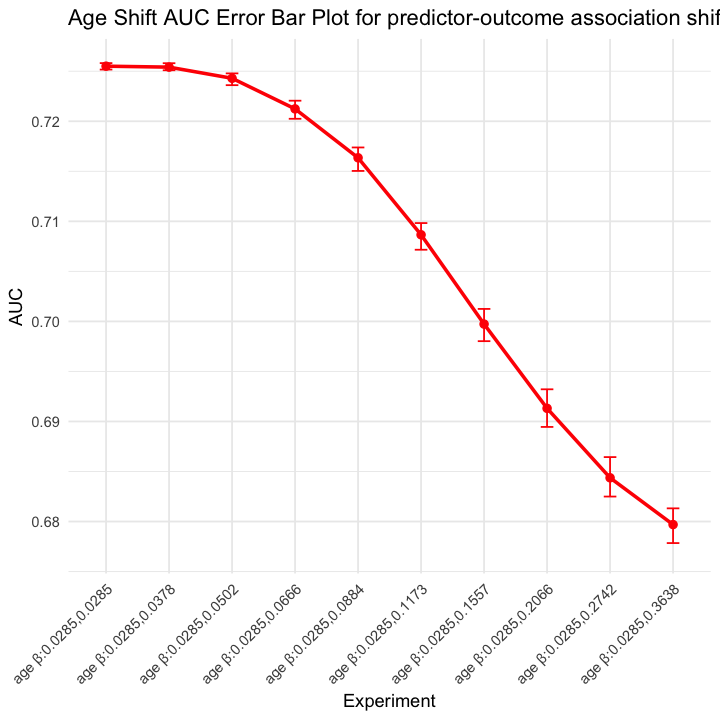

[[1]]

[[2]]

[[3]]


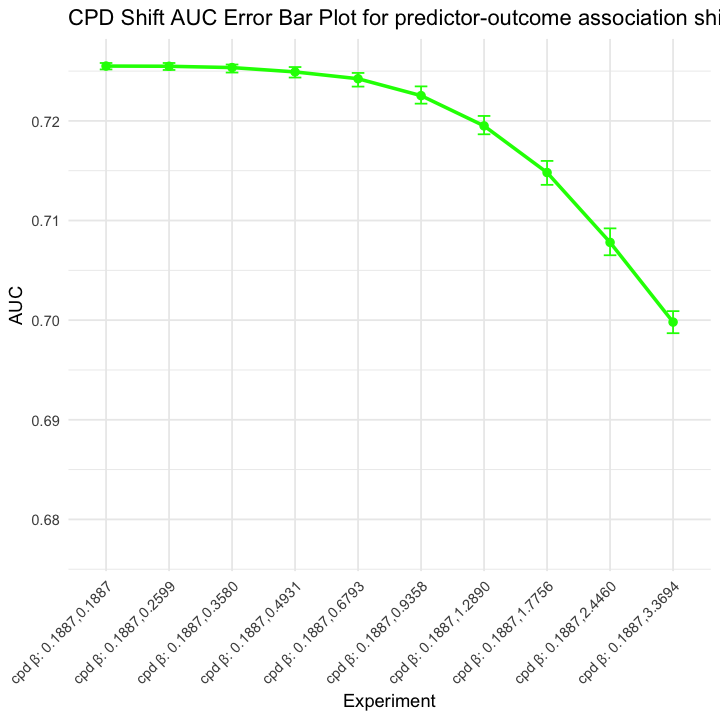

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0285' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0285' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0378' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0378' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0502' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0502' in 'mbcsToSbcs': dot su

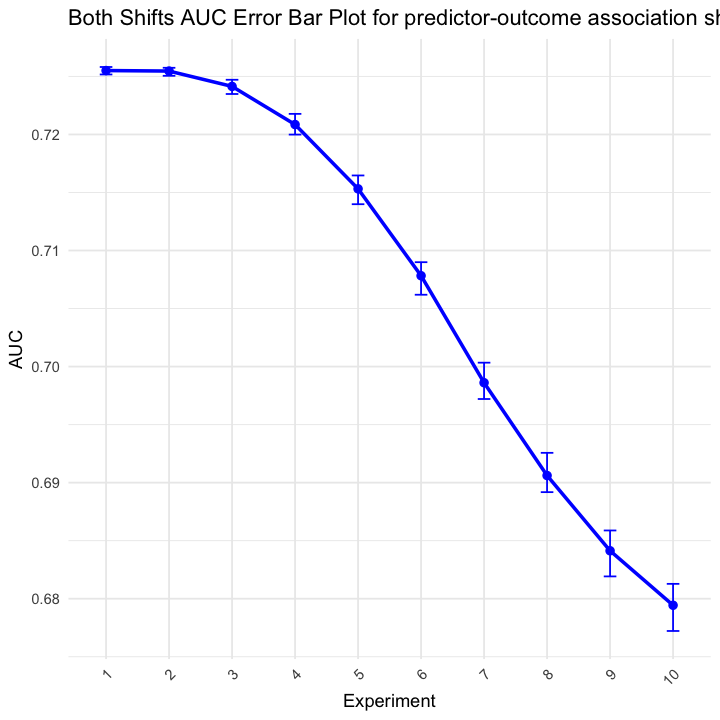

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.1887' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.1887' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.2599' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.2599' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.3580' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.3580' in 'mbcsToSbcs': 

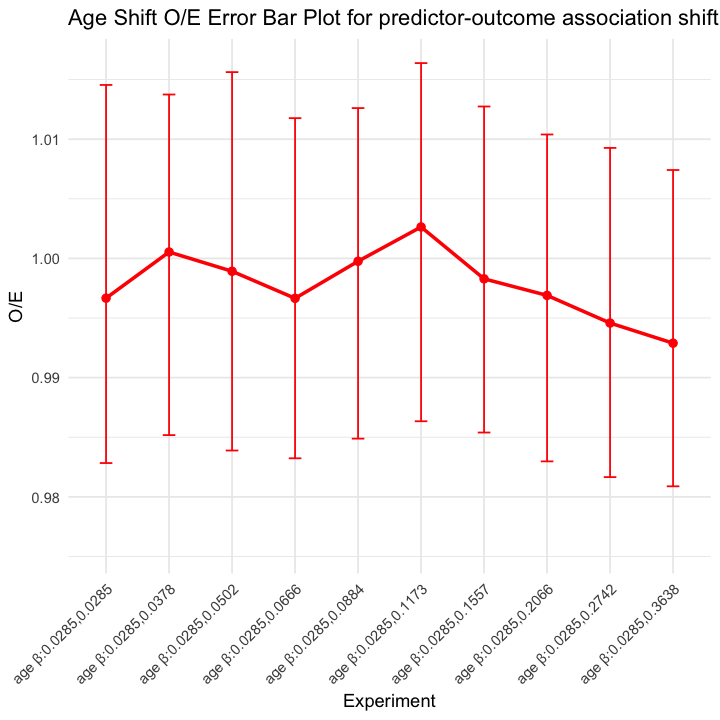

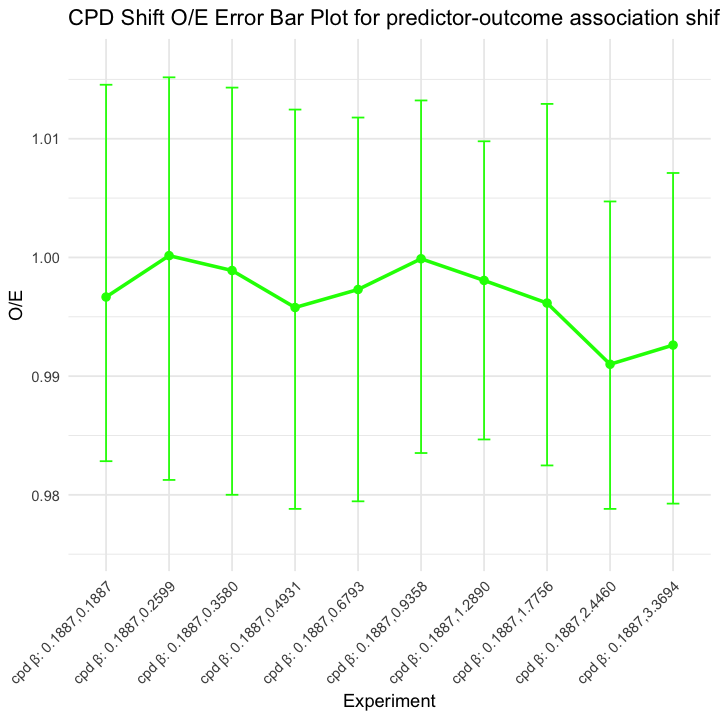

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0285' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0285' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0378' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0378' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0502' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0502' in 'mbcsToSbcs': dot su

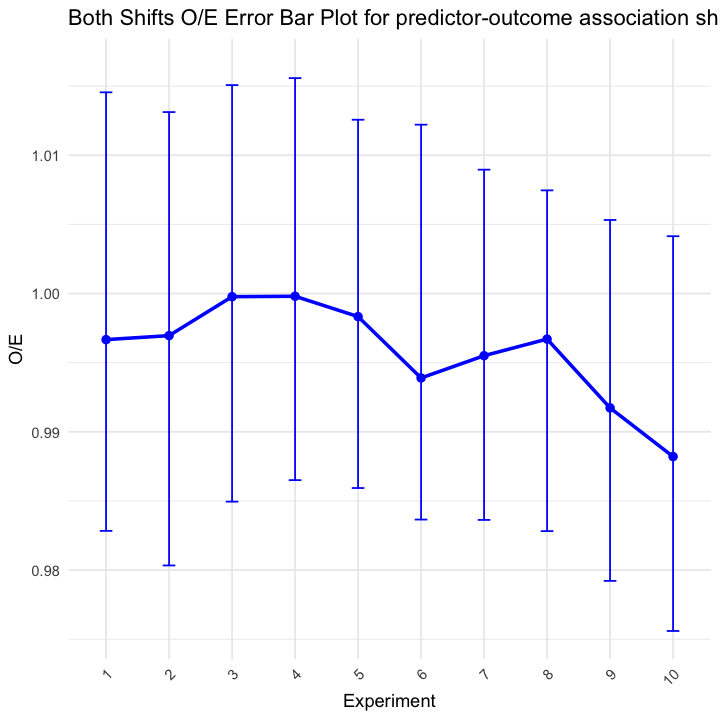

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.1887' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.1887' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.2599' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.2599' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.3580' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.3580' in 'mbcsToSbcs': 

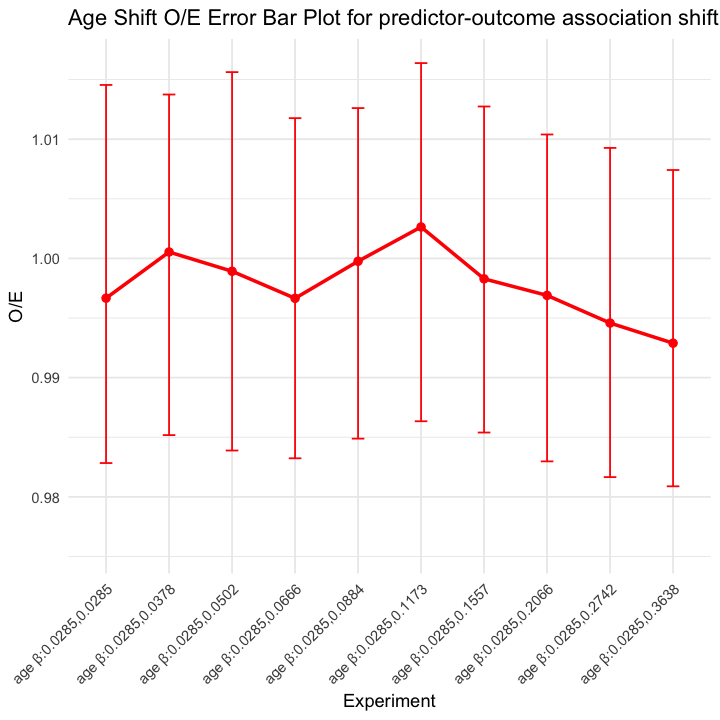

[[1]]

[[2]]

[[3]]


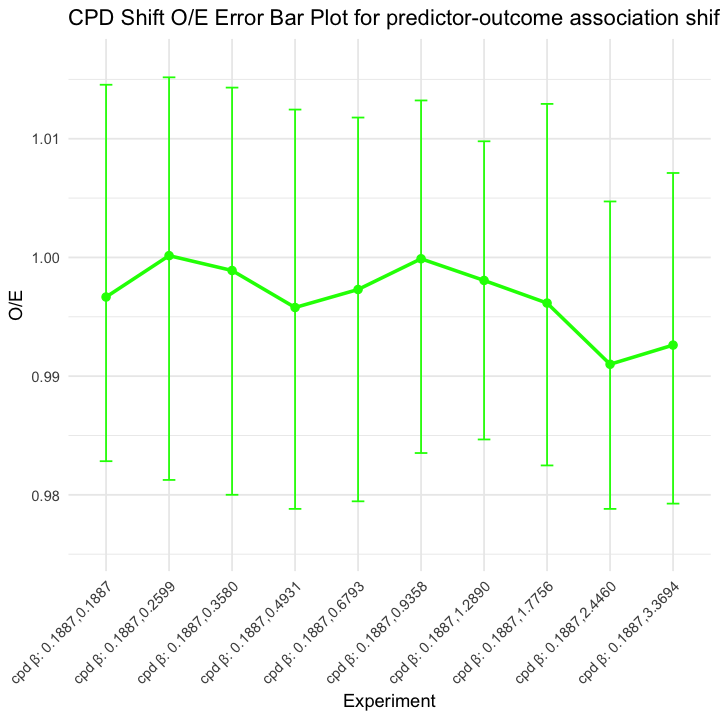

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0285' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0285' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0378' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0378' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0502' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0502' in 'mbcsToSbcs': dot su

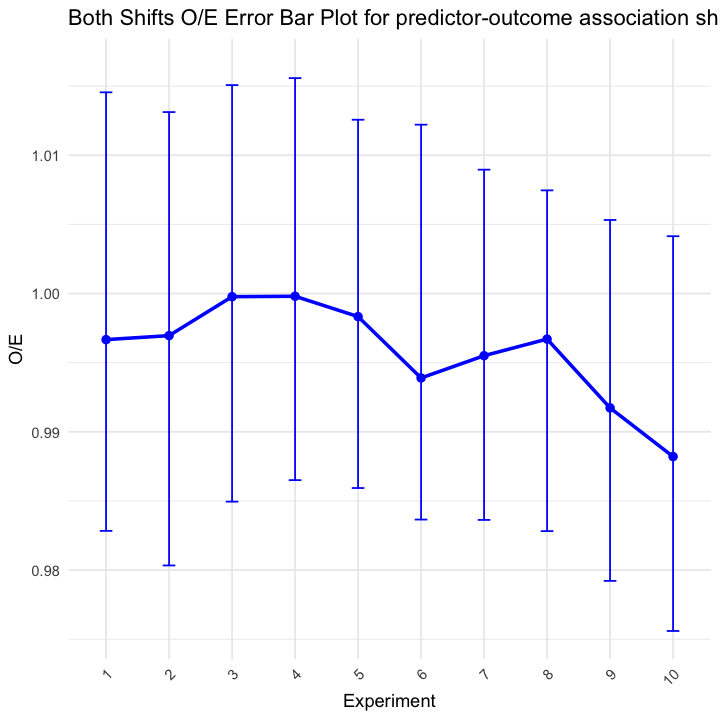

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.1887' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.1887' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.2599' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.2599' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.3580' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.3580' in 'mbcsToSbcs': 

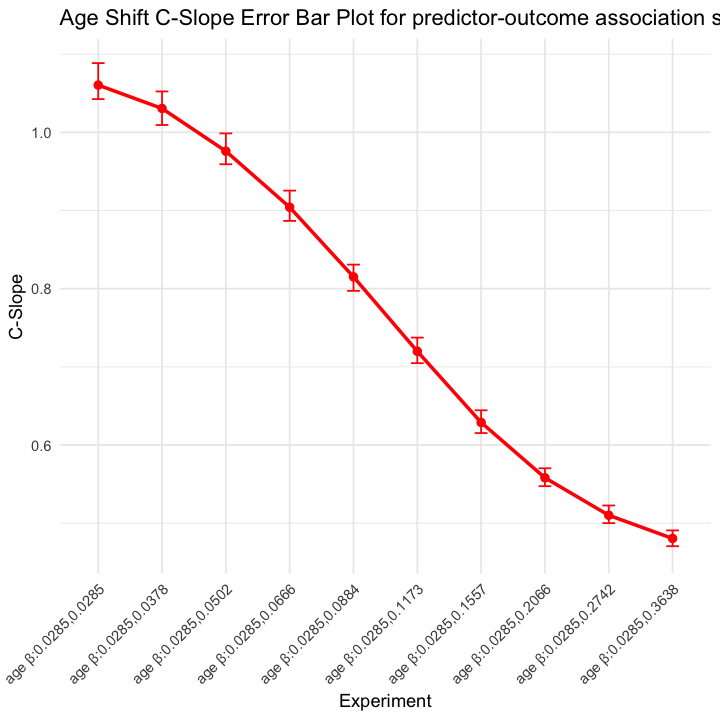

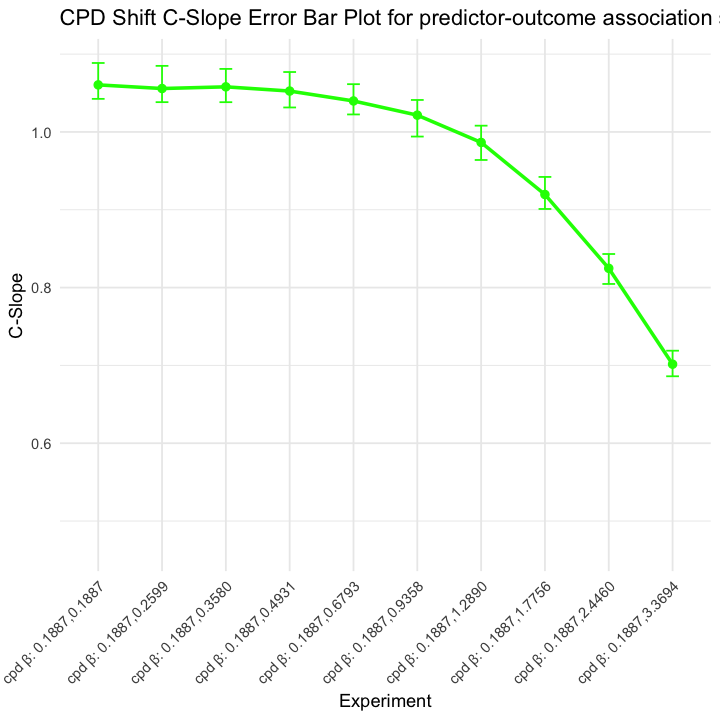

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0285' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0285' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0378' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0378' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0502' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0502' in 'mbcsToSbcs': dot su

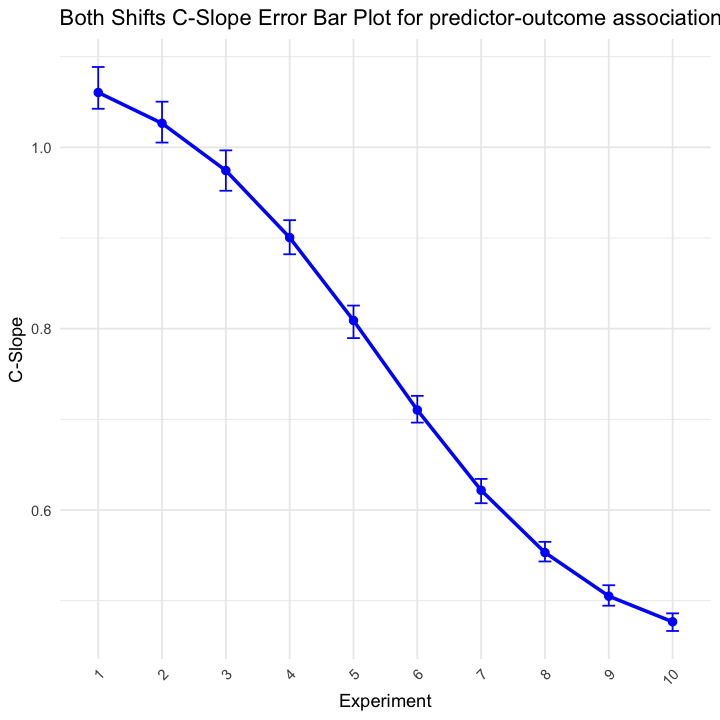

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.1887' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.1887' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.2599' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.2599' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.3580' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.3580' in 'mbcsToSbcs': 

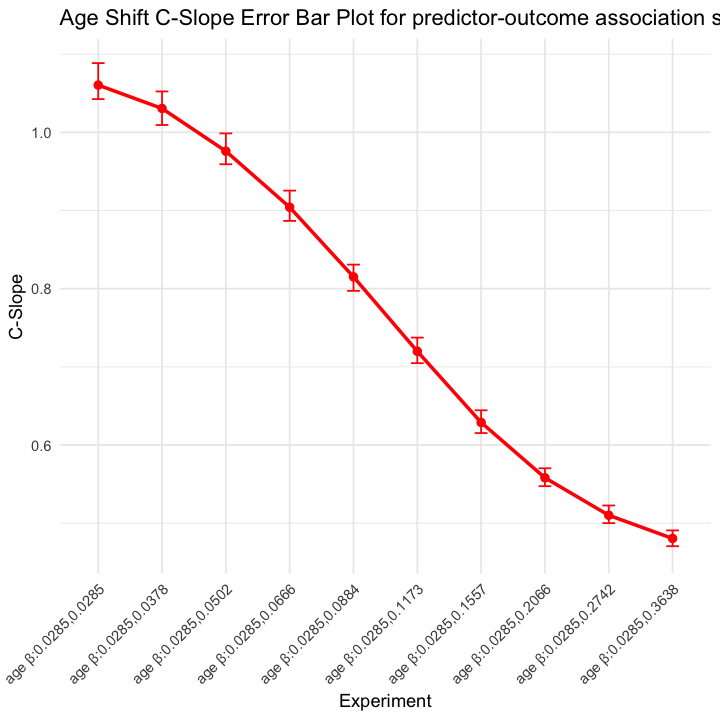

[[1]]

[[2]]

[[3]]


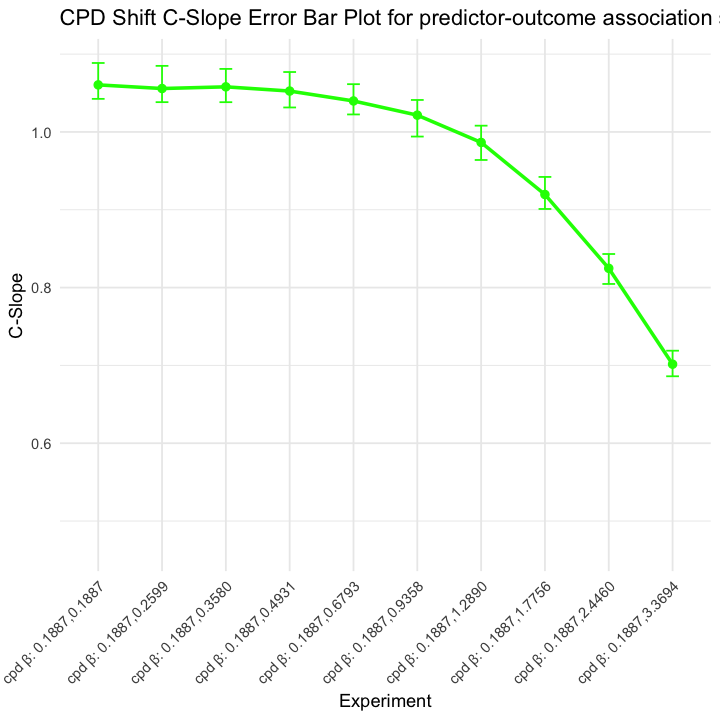

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0285' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0285' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0378' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0378' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0502' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0502' in 'mbcsToSbcs': dot su

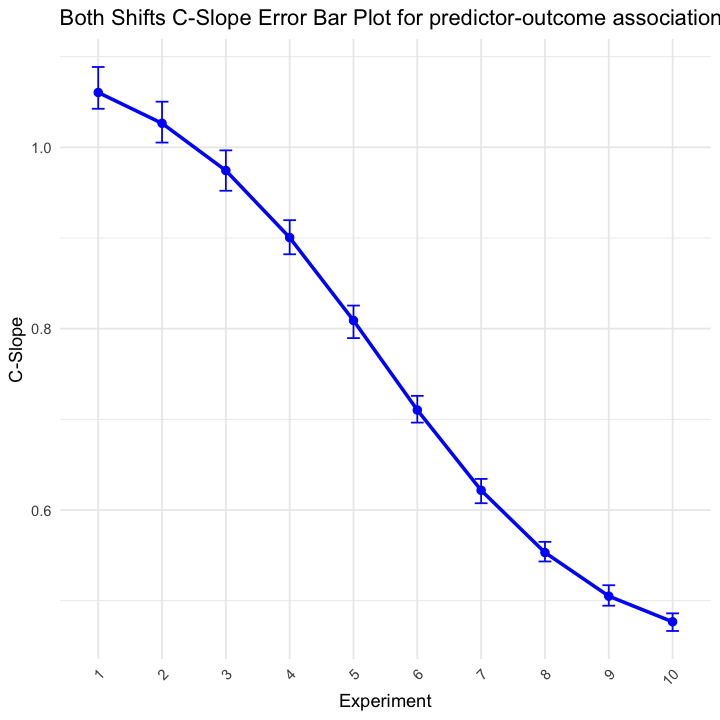

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.1887' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.1887' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.2599' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.2599' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.3580' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.3580' in 'mbcsToSbcs': 

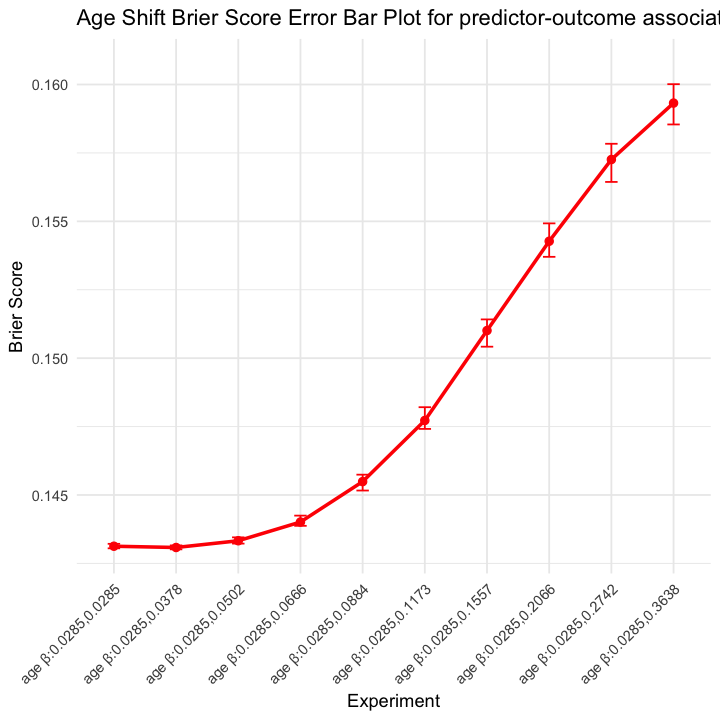

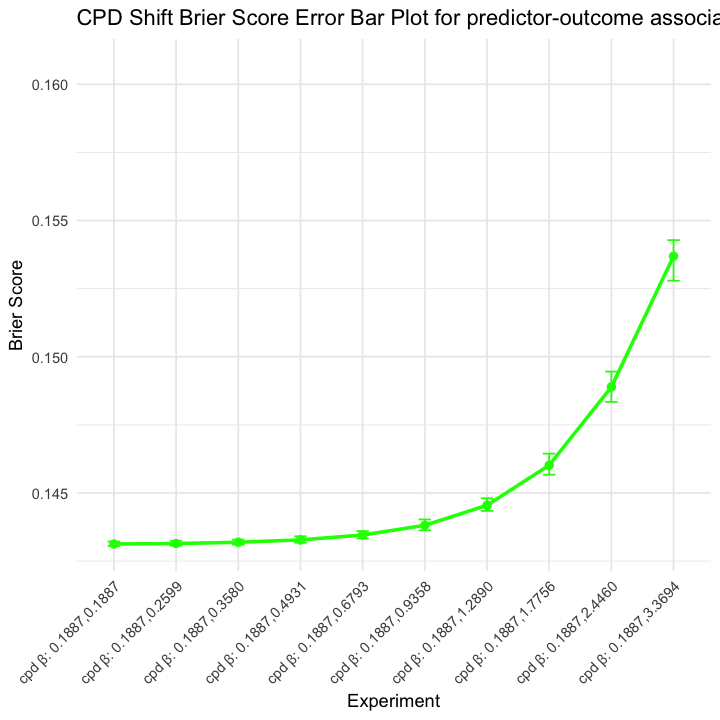

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0285' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0285' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0378' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0378' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0502' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'age β:0.0285,0.0502' in 'mbcsToSbcs': dot su

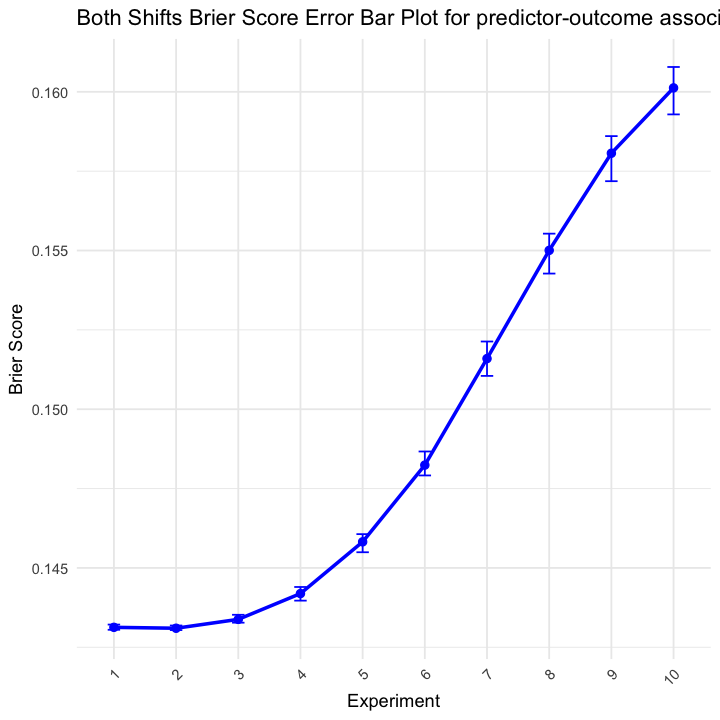

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.1887' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.1887' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.2599' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.2599' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.3580' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'cpd β: 0.1887,0.3580' in 'mbcsToSbcs': 

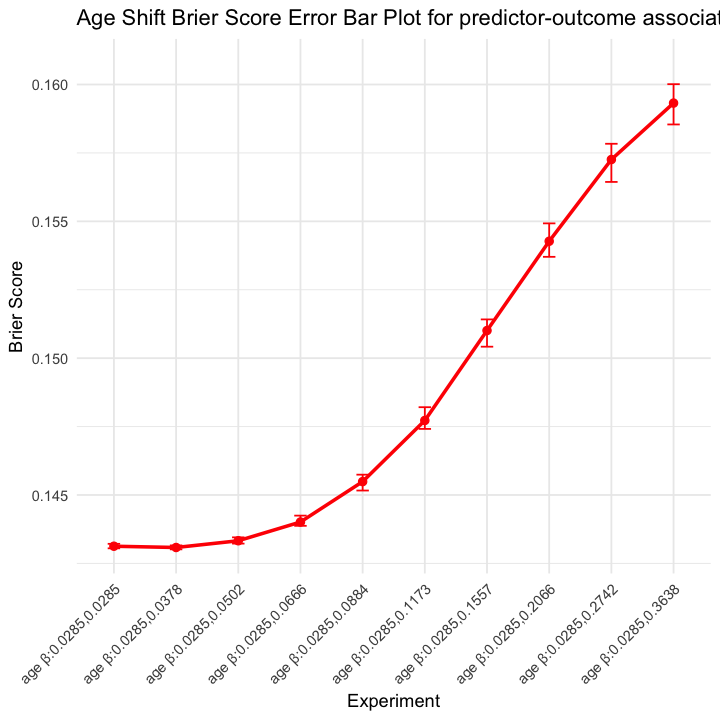

[[1]]

[[2]]

[[3]]


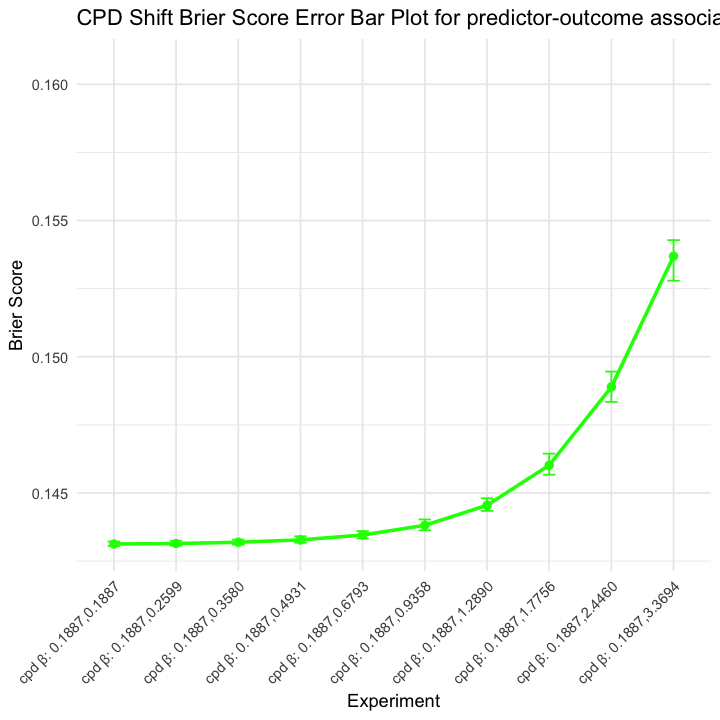

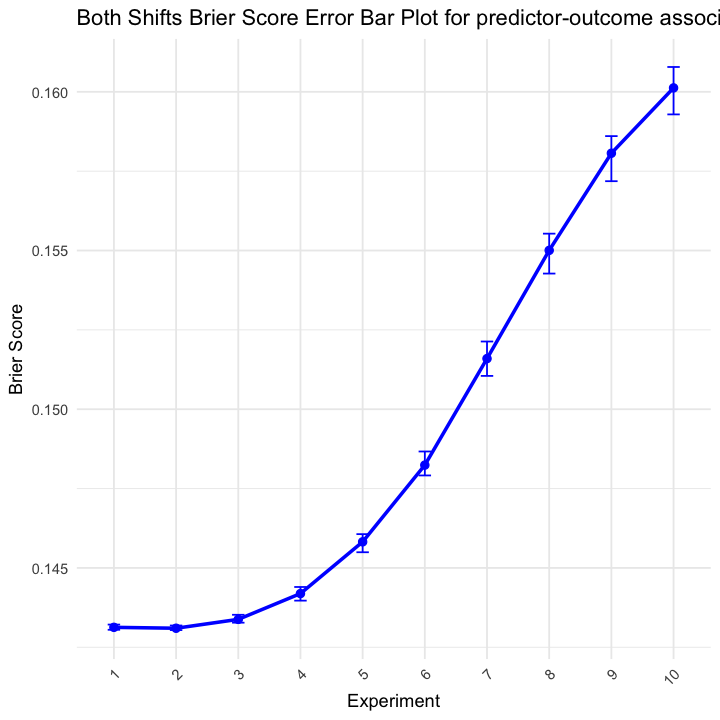

In [40]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(purrr) 

# 设置图像输出宽度
options(repr.plot.width = 6 , repr.plot.height = 6)

# 合并数据框并添加标识列
combine_data_frames <- function(df_list, names) {
  df_combined <- map2_df(df_list, names, ~mutate(.x, source = .y))
  return(df_combined)
}

# 定义数据框和相应的名称
data_frames <- list(results_shifted_age_2, results_shifted_cpd_2, results_shifted_both_2)
data_frame_names <- c("Age Shift", "CPD Shift", "Both Shifts")

# 合并所有数据框
combined_data_frame <- combine_data_frames(data_frames, data_frame_names)

# 确保 experiment 列作为因子并按唯一值排序
combined_data_frame$experiment <- factor(combined_data_frame$experiment, levels = unique(combined_data_frame$experiment))

# 创建单个图表的函数
create_single_plot <- function(combined_df, metric_median, metric_25, metric_75, metric_name, y_label, source_name) {
  colors <- c("Age Shift" = "red", "CPD Shift" = "green", "Both Shifts" = "blue")
  
  ggplot(combined_df %>% filter(source == source_name), aes(x = experiment, y = !!sym(metric_median), color = source)) +
    geom_line(aes(group = source), size = 1, color = colors[source_name]) +
    geom_point(size = 2, color = colors[source_name]) +
    geom_errorbar(aes(ymin = !!sym(metric_25), ymax = !!sym(metric_75)), width = 0.2, color = colors[source_name]) +
    theme_minimal() +
    labs(title = paste(source_name, metric_name, "Error Bar Plot for predictor-outcome association shift"),
         x = "Experiment", y = y_label) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    ylim(min(combined_df[[metric_25]], na.rm = TRUE), max(combined_df[[metric_75]], na.rm = TRUE))
}

# 创建各个性能指标的图表
# 这里我们为每个 "source" 创建单独的图表
sources <- c("Age Shift", "CPD Shift", "Both Shifts")

# 分别为 AUC、O/E、C-Slope 和 Brier Score 创建图表
plots_auc <- lapply(sources, function(source) create_single_plot(combined_data_frame, "auc_median", "auc_25", "auc_75", "AUC", "AUC", source))
plots_oe <- lapply(sources, function(source) create_single_plot(combined_data_frame, "o_e_median", "o_e_25", "o_e_75", "O/E", "O/E", source))
plots_cslope <- lapply(sources, function(source) create_single_plot(combined_data_frame, "c_slope_median", "c_slope_25", "c_slope_75", "C-Slope", "C-Slope", source))
plots_brier_score <- lapply(sources, function(source) create_single_plot(combined_data_frame, "brier_score_median", "brier_score_25", "brier_score_75", "Brier Score", "Brier Score", source))

# 打印合并后的图表
# AUC图表
lapply(plots_auc, print)
# O/E图表
lapply(plots_oe, print)
# C-Slope图表
lapply(plots_cslope, print)
# Brier Score图表
lapply(plots_brier_score, print)


In [ ]:
library(xgboost)
library(pROC)
library(DescTools)
library(ModelMetrics)
library(rms)

# 设置随机种子以保证可重复性
set.seed(123)

# 数据生成模块
# 数据生成偏移的data_shifted_age模块
generate_shifted_data_age_2_ml <- function(seed, beta_age_start, beta_age_end) {
  set.seed(seed)
  data <- generate_shifted_data_age(
    time_periods = 2,
    n = 9602,
    target_mortality_rate = 0.2,
    age_mean = 64.6,
    age_sd = 12.5,
    sex_prob = 0.309,
    cpd_prob = 0.107,
    pcs_prob = 0.282,
    cps_prob = 0.241, 
    beta_age_start = beta_age_start,
    beta_age_end = beta_age_end,
    beta_sex = 0.2196434,
    beta_cpd = 0.1886564,
    beta_pcs = 1.118599,
    beta_cps = 1.086517
  )
  return(data)
}

experiments_age <- list(
  list(name = "gradual_shifted_age_1", beta_age_start = 0.0285181, beta_age_end = 0.0285181),
  list(name = "gradual_shifted_age_2", beta_age_start = 0.0285181, beta_age_end = 0.0378427),
  list(name = "gradual_shifted_age_3", beta_age_start = 0.0285181, beta_age_end = 0.0502162),
  list(name = "gradual_shifted_age_4", beta_age_start = 0.0285181, beta_age_end = 0.0666354),
  list(name = "gradual_shifted_age_5", beta_age_start = 0.0285181, beta_age_end = 0.0884233),
  list(name = "gradual_shifted_age_6", beta_age_start = 0.0285181, beta_age_end = 0.1173351),
  list(name = "gradual_shifted_age_7", beta_age_start = 0.0285181, beta_age_end = 0.1557003),
  list(name = "gradual_shifted_age_8", beta_age_start = 0.0285181, beta_age_end = 0.2066098),
  list(name = "gradual_shifted_age_9", beta_age_start = 0.0285181, beta_age_end = 0.2741652),
  list(name = "gradual_shifted_age_10", beta_age_start = 0.0285181, beta_age_end = 0.3638093)
)

# 循环200个随机种子，生成数据并计算性能指标
set.seed(123)  # 确保结果可重复
num_simulations <- 200

results_shifted_age_2_ml <- data.frame()

for (exp in experiments_age) {
  results <- data.frame(auc = numeric(num_simulations), o_e = numeric(num_simulations), c_slope = numeric(num_simulations), brier_score = numeric(num_simulations))
  for (i in 1:num_simulations) {
    # 设置随机种子
    set.seed(i)

    # 修改：生成数据时传递 beta_age_start 和 beta_age_end 参数
    data_shifted_xgb <- generate_shifted_data_age_2_ml(i, exp$beta_age_start, exp$beta_age_end)

    # 确保 mortality 变量是因子类型
    data_shifted_xgb$mortality <- as.factor(data_shifted_xgb$mortality)
    data_val$mortality <- as.factor(data_val$mortality)

    # 转换数据格式
    # 修改：确保选择正确的数据列
    dtrain <- xgb.DMatrix(data = as.matrix(data_shifted_xgb[, -6]), label = as.numeric(data_shifted_xgb$mortality) - 1)
    dval <- xgb.DMatrix(data = as.matrix(data_val[, -6]), label = as.numeric(data_val$mortality) - 1)

    # 设置参数
    params <- list(
      booster = "gbtree",
      objective = "binary:logistic",
      eta = 0.1,
      max_depth = 3,
      eval_metric = "auc"
    )

    # 训练模型
    xgb_model <- xgb.train(params, dtrain, nrounds = 50)

    # 预测
    predictions <- predict(xgb_model, dval)

    # 确保测试集的mortality变量是二进制数值类型
    test_mortality <- as.numeric(data_val$mortality) - 1

    # 计算 AUC
    auc <- roc(data_val$mortality, predictions)$auc
    print(paste("auc:", auc))

    # 计算 O/E 比率
    observed <- sum(test_mortality)
    expected <- sum(predictions)
    oe_ratio <- observed / expected
    print(paste("O/E 比率:", oe_ratio))

    # 计算校准斜率 (C-slope)
    # 修改：确保 val.prob 函数正确使用并提取斜率
    calibration <- val.prob(predictions, test_mortality, xlab="Predicted Probability", ylab="Observed Probability", pl = FALSE, smooth = FALSE)
    c_slope <- calibration["Slope"]
    print(paste("c_slope:", c_slope))

    # 计算 Brier 分数
    brier_score <- BrierScore(test_mortality, predictions)
    print(paste("Brier 分数:", brier_score))

    # 保存结果
    results[i, ] <- c(auc = auc, o_e = oe_ratio, c_slope = c_slope, brier_score = brier_score)
  }

  # 计算中位数、25%和75%的性能指标
  median_metrics_shifted_age_2_ml <- apply(results, 2, median)
  quantile_25_metrics_shifted_age_2_ml <- apply(results, 2, quantile, probs = 0.25)
  quantile_75_metrics_shifted_age_2_ml <- apply(results, 2, quantile, probs = 0.75)

  # 将实验名称和结果添加到总的结果数据框
  summary_metrics_shifted_age_2_ml <- data.frame(
    experiment = exp$name,
    auc = paste0(
      format(median_metrics_shifted_age_2_ml['auc'], digits = 7, nsmall = 7), " (", 
      format(quantile_25_metrics_shifted_age_2_ml['auc'], digits = 7, nsmall = 7), ", ", 
      format(quantile_75_metrics_shifted_age_2_ml['auc'], digits = 7, nsmall = 7), ")"
    ),
    o_e = paste0(
      format(median_metrics_shifted_age_2_ml['o_e'], digits = 7, nsmall = 7), " (", 
      format(quantile_25_metrics_shifted_age_2_ml['o_e'], digits = 7, nsmall = 7), ", ", 
      format(quantile_75_metrics_shifted_age_2_ml['o_e'], digits = 7, nsmall = 7), ")"
    ),
    c_slope = paste0(
      format(median_metrics_shifted_age_2_ml['c_slope'], digits = 7, nsmall = 7), " (", 
      format(quantile_25_metrics_shifted_age_2_ml['c_slope'], digits = 7, nsmall = 7), ", ", 
      format(quantile_75_metrics_shifted_age_2_ml['c_slope'], digits = 7, nsmall = 7), ")"
    ),
    brier_score = paste0(
      format(median_metrics_shifted_age_2_ml['brier_score'], digits = 7, nsmall = 7), " (", 
      format(quantile_25_metrics_shifted_age_2_ml['brier_score'], digits = 7, nsmall = 7), ", ", 
      format(quantile_75_metrics_shifted_age_2_ml['brier_score'], digits = 7, nsmall = 7), ")"
    )
  )
  
  results_shifted_age_2_ml <- rbind(results_shifted_age_2_ml, summary_metrics_shifted_age_2_ml)
}

# 打印最终结果
results_shifted_age_2_ml
